<a href="https://colab.research.google.com/github/sohansputhran/Algorithmic-Redistricting/blob/main/Iowa_BoxPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving IA_counties.csv to IA_counties.csv


{'IA_counties.csv': b"X,Y,STATEFP10,COUNTYFP10,GEOID10,NAME10,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_NHPI,NH_OTHER,NH_2MORE,HISP,H_WHITE,H_BLACK,H_AMIN,H_ASIAN,N_NHPI,H_OTHER,H_2MORE,VAP,HVAP,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,TOTVOT00,PRES00D,PRES00R,PRES00G,PRES00OTH,TOTVOT04,PRES04D,PRES04R,PRES04OTH,TOTVOT08,PRES08D,PRES08R,PRES08OTH,TOTVOT12,PRES12D,PRES12R,PRES12OTH,TOTVOT16,PRES16D,PRES16R,PRES16OTH,CD\r\n-92.9990010405311,42.0358010107192,19,127,19127,Marshall,Marshall County,1482770678,1803086,+42.0416910,-092.9814523,40648,31807,629,104,526,39,33,493,7017,4264,50,82,10,11,2263,337,30344,3762,25417,421,67,406,26,20,225,17624,8322,8785,340,177,19164,9443,9557,164,18657,10023,8278,356,19064,10257,8472,335,17980,7652,9146,1182,1\r\n-92.0669659987178,42.0802989929437,19,011,19011,Benton,Benton County,1855117342,5760770,+42.0925474,-092.0576300,26076,25387,93,41,66,2,5,207,275,182,9,4,0,0,48,32,19430,155,1906

In [35]:
import pandas as pd
df = pd.read_csv('IA_counties.csv')
df

,X,Y,STATEFP10,COUNTYFP10,GEOID10,NAME10,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_NHPI,NH_OTHER,NH_2MORE,HISP,H_WHITE,H_BLACK,H_AMIN,H_ASIAN,N_NHPI,H_OTHER,H_2MORE,VAP,HVAP,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,TOTVOT00,PRES00D,PRES00R,PRES00G,PRES00OTH,TOTVOT04,PRES04D,PRES04R,PRES04OTH,TOTVOT08,PRES08D,PRES08R,PRES08OTH,TOTVOT12,PRES12D,PRES12R,PRES12OTH,TOTVOT16,PRES16D,PRES16R,PRES16OTH,CD
0,-92.999001,42.035801,19,127,19127,Marshall,Marshall County,1482770678,1803086,42.041691,-92.981452,40648,31807,629,104,526,39,33,493,7017,4264,50,82,10,11,2263,337,30344,3762,25417,421,67,406,26,20,225,17624,8322,8785,340,177,19164,9443,9557,164,18657,10023,8278,356,19064,10257,8472,335,17980,7652,9146,1182,1
1,-92.066966,42.080299,19,11,19011,Benton,Benton County,1855117342,5760770,42.092547,-92.057630,26076,25387,93,41,66,2,5,207,275,182,9,4,0,0,48,32,19430,155,19068,49,34,46,2,4,72,11766,5915,5468,231,152,13501,6747,6658,96,13712,7058,6447,207,14023,6862,6940,221,13844,4678,8232,934,1
2,-95.150846,43.082520,19,41,19041,Clay,Clay County,1469139214,13866941,43.079822,-95.149726,16667,15843,68,36,98,0,1,144,477,234,1,2,1,1,195,43,12837,265,12386,39,25,67,0,0,55,7578,3294,3992,166,126,8588,3547,4898,143,8398,3925,4355,118,8502,3385,4951,166,8617,2249,5877,491,4
3,-95.325464,41.684636,19,165,19165,Shelby,Shelby County,1530110414,1486135,41.679014,-95.308917,12167,11763,31,24,46,0,7,77,219,146,1,4,0,2,61,5,9301,133,9056,19,16,26,0,5,46,6009,2179,3655,113,62,6670,2355,4256,59,6453,2863,3488,102,6483,2469,3911,103,6370,1662,4362,346,4
4,-91.352586,42.862146,19,43,19043,Clayton,Clayton County,2016405612,36586071,42.840998,-91.323511,18129,17563,60,13,42,17,2,126,306,168,1,7,0,0,108,22,13925,163,13610,28,12,27,15,0,70,8571,4238,4034,206,93,9168,4736,4312,120,8989,5195,3651,143,9138,4806,4164,168,9129,3237,5317,575,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,-91.538382,40.594834,19,111,19111,Lee,Lee County,1340366450,55293745,40.647588,-91.477157,35862,32833,1094,61,181,7,11,583,1092,704,24,7,2,4,240,111,27901,686,25897,860,54,139,6,6,253,16572,9632,6339,325,276,17858,10152,7472,234,17224,9821,7062,341,18911,10714,7785,412,16151,6215,8803,1133,2
95,-93.465211,42.035540,19,169,19169,Story,Story County,1483592867,2152172,42.037538,-93.466093,89542,77812,2125,134,5369,17,112,1278,2695,1532,71,29,14,3,806,240,73589,1912,64617,1493,95,4647,15,59,751,35364,17478,16228,1317,341,44652,23296,20819,537,46575,26548,18995,1032,47150,26192,19668,1290,50667,25709,19458,5500,4
96,-92.768104,42.382062,19,75,19075,Grundy,Grundy County,1299805924,94406,42.403323,-92.790261,12453,12190,26,4,27,7,1,76,122,79,2,0,0,0,30,11,9488,50,9382,10,2,14,1,0,29,6111,2139,3851,70,51,6849,2386,4429,34,6828,2790,3945,93,6962,2635,4215,112,6872,1856,4527,489,4
97,-95.550817,41.333039,19,155,19155,Pottawattamie,Pottawattamie County,2147483647,22925740,41.340184,-95.544905,93158,83609,1216,334,549,25,36,1238,6151,2949,51,107,21,2,2489,532,70679,3559,64968,848,251,411,21,23,598,34467,14726,18783,690,268,41820,16906,24558,356,42320,20436,21237,647,42301,19644,21860,797,42680,15355,24447,2878,3


In [36]:
df = df.drop(['NAMELSAD10'], axis=1)
df

,X,Y,STATEFP10,COUNTYFP10,GEOID10,NAME10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_NHPI,NH_OTHER,NH_2MORE,HISP,H_WHITE,H_BLACK,H_AMIN,H_ASIAN,N_NHPI,H_OTHER,H_2MORE,VAP,HVAP,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,TOTVOT00,PRES00D,PRES00R,PRES00G,PRES00OTH,TOTVOT04,PRES04D,PRES04R,PRES04OTH,TOTVOT08,PRES08D,PRES08R,PRES08OTH,TOTVOT12,PRES12D,PRES12R,PRES12OTH,TOTVOT16,PRES16D,PRES16R,PRES16OTH,CD
0,-92.999001,42.035801,19,127,19127,Marshall,1482770678,1803086,42.041691,-92.981452,40648,31807,629,104,526,39,33,493,7017,4264,50,82,10,11,2263,337,30344,3762,25417,421,67,406,26,20,225,17624,8322,8785,340,177,19164,9443,9557,164,18657,10023,8278,356,19064,10257,8472,335,17980,7652,9146,1182,1
1,-92.066966,42.080299,19,11,19011,Benton,1855117342,5760770,42.092547,-92.057630,26076,25387,93,41,66,2,5,207,275,182,9,4,0,0,48,32,19430,155,19068,49,34,46,2,4,72,11766,5915,5468,231,152,13501,6747,6658,96,13712,7058,6447,207,14023,6862,6940,221,13844,4678,8232,934,1
2,-95.150846,43.082520,19,41,19041,Clay,1469139214,13866941,43.079822,-95.149726,16667,15843,68,36,98,0,1,144,477,234,1,2,1,1,195,43,12837,265,12386,39,25,67,0,0,55,7578,3294,3992,166,126,8588,3547,4898,143,8398,3925,4355,118,8502,3385,4951,166,8617,2249,5877,491,4
3,-95.325464,41.684636,19,165,19165,Shelby,1530110414,1486135,41.679014,-95.308917,12167,11763,31,24,46,0,7,77,219,146,1,4,0,2,61,5,9301,133,9056,19,16,26,0,5,46,6009,2179,3655,113,62,6670,2355,4256,59,6453,2863,3488,102,6483,2469,3911,103,6370,1662,4362,346,4
4,-91.352586,42.862146,19,43,19043,Clayton,2016405612,36586071,42.840998,-91.323511,18129,17563,60,13,42,17,2,126,306,168,1,7,0,0,108,22,13925,163,13610,28,12,27,15,0,70,8571,4238,4034,206,93,9168,4736,4312,120,8989,5195,3651,143,9138,4806,4164,168,9129,3237,5317,575,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,-91.538382,40.594834,19,111,19111,Lee,1340366450,55293745,40.647588,-91.477157,35862,32833,1094,61,181,7,11,583,1092,704,24,7,2,4,240,111,27901,686,25897,860,54,139,6,6,253,16572,9632,6339,325,276,17858,10152,7472,234,17224,9821,7062,341,18911,10714,7785,412,16151,6215,8803,1133,2
95,-93.465211,42.035540,19,169,19169,Story,1483592867,2152172,42.037538,-93.466093,89542,77812,2125,134,5369,17,112,1278,2695,1532,71,29,14,3,806,240,73589,1912,64617,1493,95,4647,15,59,751,35364,17478,16228,1317,341,44652,23296,20819,537,46575,26548,18995,1032,47150,26192,19668,1290,50667,25709,19458,5500,4
96,-92.768104,42.382062,19,75,19075,Grundy,1299805924,94406,42.403323,-92.790261,12453,12190,26,4,27,7,1,76,122,79,2,0,0,0,30,11,9488,50,9382,10,2,14,1,0,29,6111,2139,3851,70,51,6849,2386,4429,34,6828,2790,3945,93,6962,2635,4215,112,6872,1856,4527,489,4
97,-95.550817,41.333039,19,155,19155,Pottawattamie,2147483647,22925740,41.340184,-95.544905,93158,83609,1216,334,549,25,36,1238,6151,2949,51,107,21,2,2489,532,70679,3559,64968,848,251,411,21,23,598,34467,14726,18783,690,268,41820,16906,24558,356,42320,20436,21237,647,42301,19644,21860,797,42680,15355,24447,2878,3


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df.columns

Index(['X', 'Y', 'STATEFP10', 'COUNTYFP10', 'GEOID10', 'NAME10', 'ALAND10',
       'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'TOTPOP', 'NH_WHITE',
       'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'NH_2MORE',
       'HISP', 'H_WHITE', 'H_BLACK', 'H_AMIN', 'H_ASIAN', 'N_NHPI', 'H_OTHER',
       'H_2MORE', 'VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP',
       'NHPIVAP', 'OTHERVAP', '2MOREVAP', 'TOTVOT00', 'PRES00D', 'PRES00R',
       'PRES00G', 'PRES00OTH', 'TOTVOT04', 'PRES04D', 'PRES04R', 'PRES04OTH',
       'TOTVOT08', 'PRES08D', 'PRES08R', 'PRES08OTH', 'TOTVOT12', 'PRES12D',
       'PRES12R', 'PRES12OTH', 'TOTVOT16', 'PRES16D', 'PRES16R', 'PRES16OTH',
       'CD'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


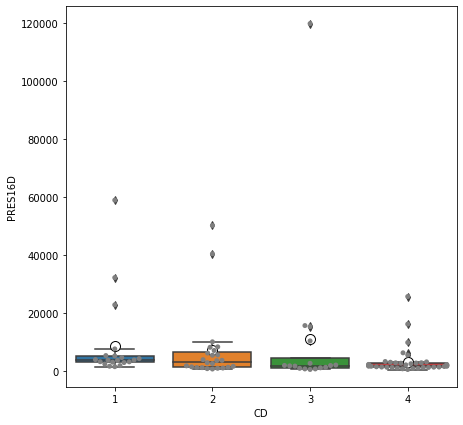

In [23]:
x = "CD"
y = "PRES16D"
plt.figure(figsize=(7,7,))
ax = sns.boxplot(x = x, y = y, data = df, showmeans = True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax = sns.swarmplot(x = x, y = y, data = df, color = "grey")
plt.show()

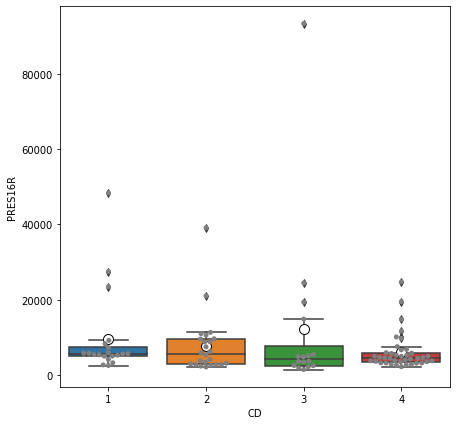

In [24]:
x = "CD"
y = "PRES16R"
plt.figure(figsize=(7,7,))
ax = sns.boxplot(x = x, y = y, data = df, showmeans = True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax = sns.swarmplot(x = x, y = y, data = df, color = "grey")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


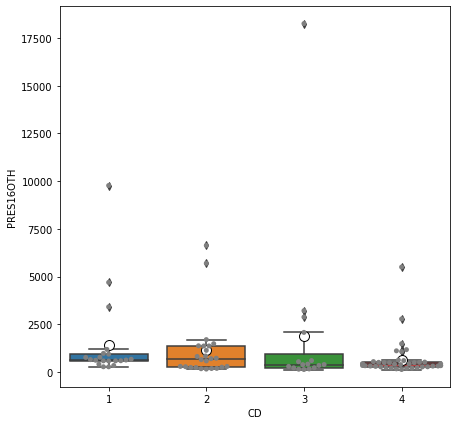

In [26]:
x = "CD"
y = "PRES16OTH"
plt.figure(figsize=(7,7,))
ax = sns.boxplot(x = x, y = y, data = df, showmeans = True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax = sns.swarmplot(x = x, y = y, data = df, color = "grey")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


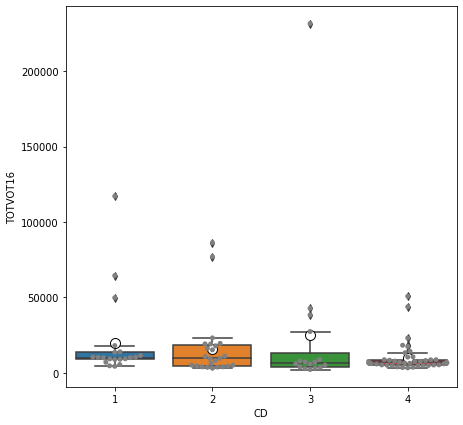

In [43]:
x = "CD"
y = "TOTVOT16"
plt.figure(figsize=(7,7,))
ax = sns.boxplot(x = x, y = y, data = df, showmeans = True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax = sns.swarmplot(x = x, y = y, data = df, color = "grey")
plt.show()

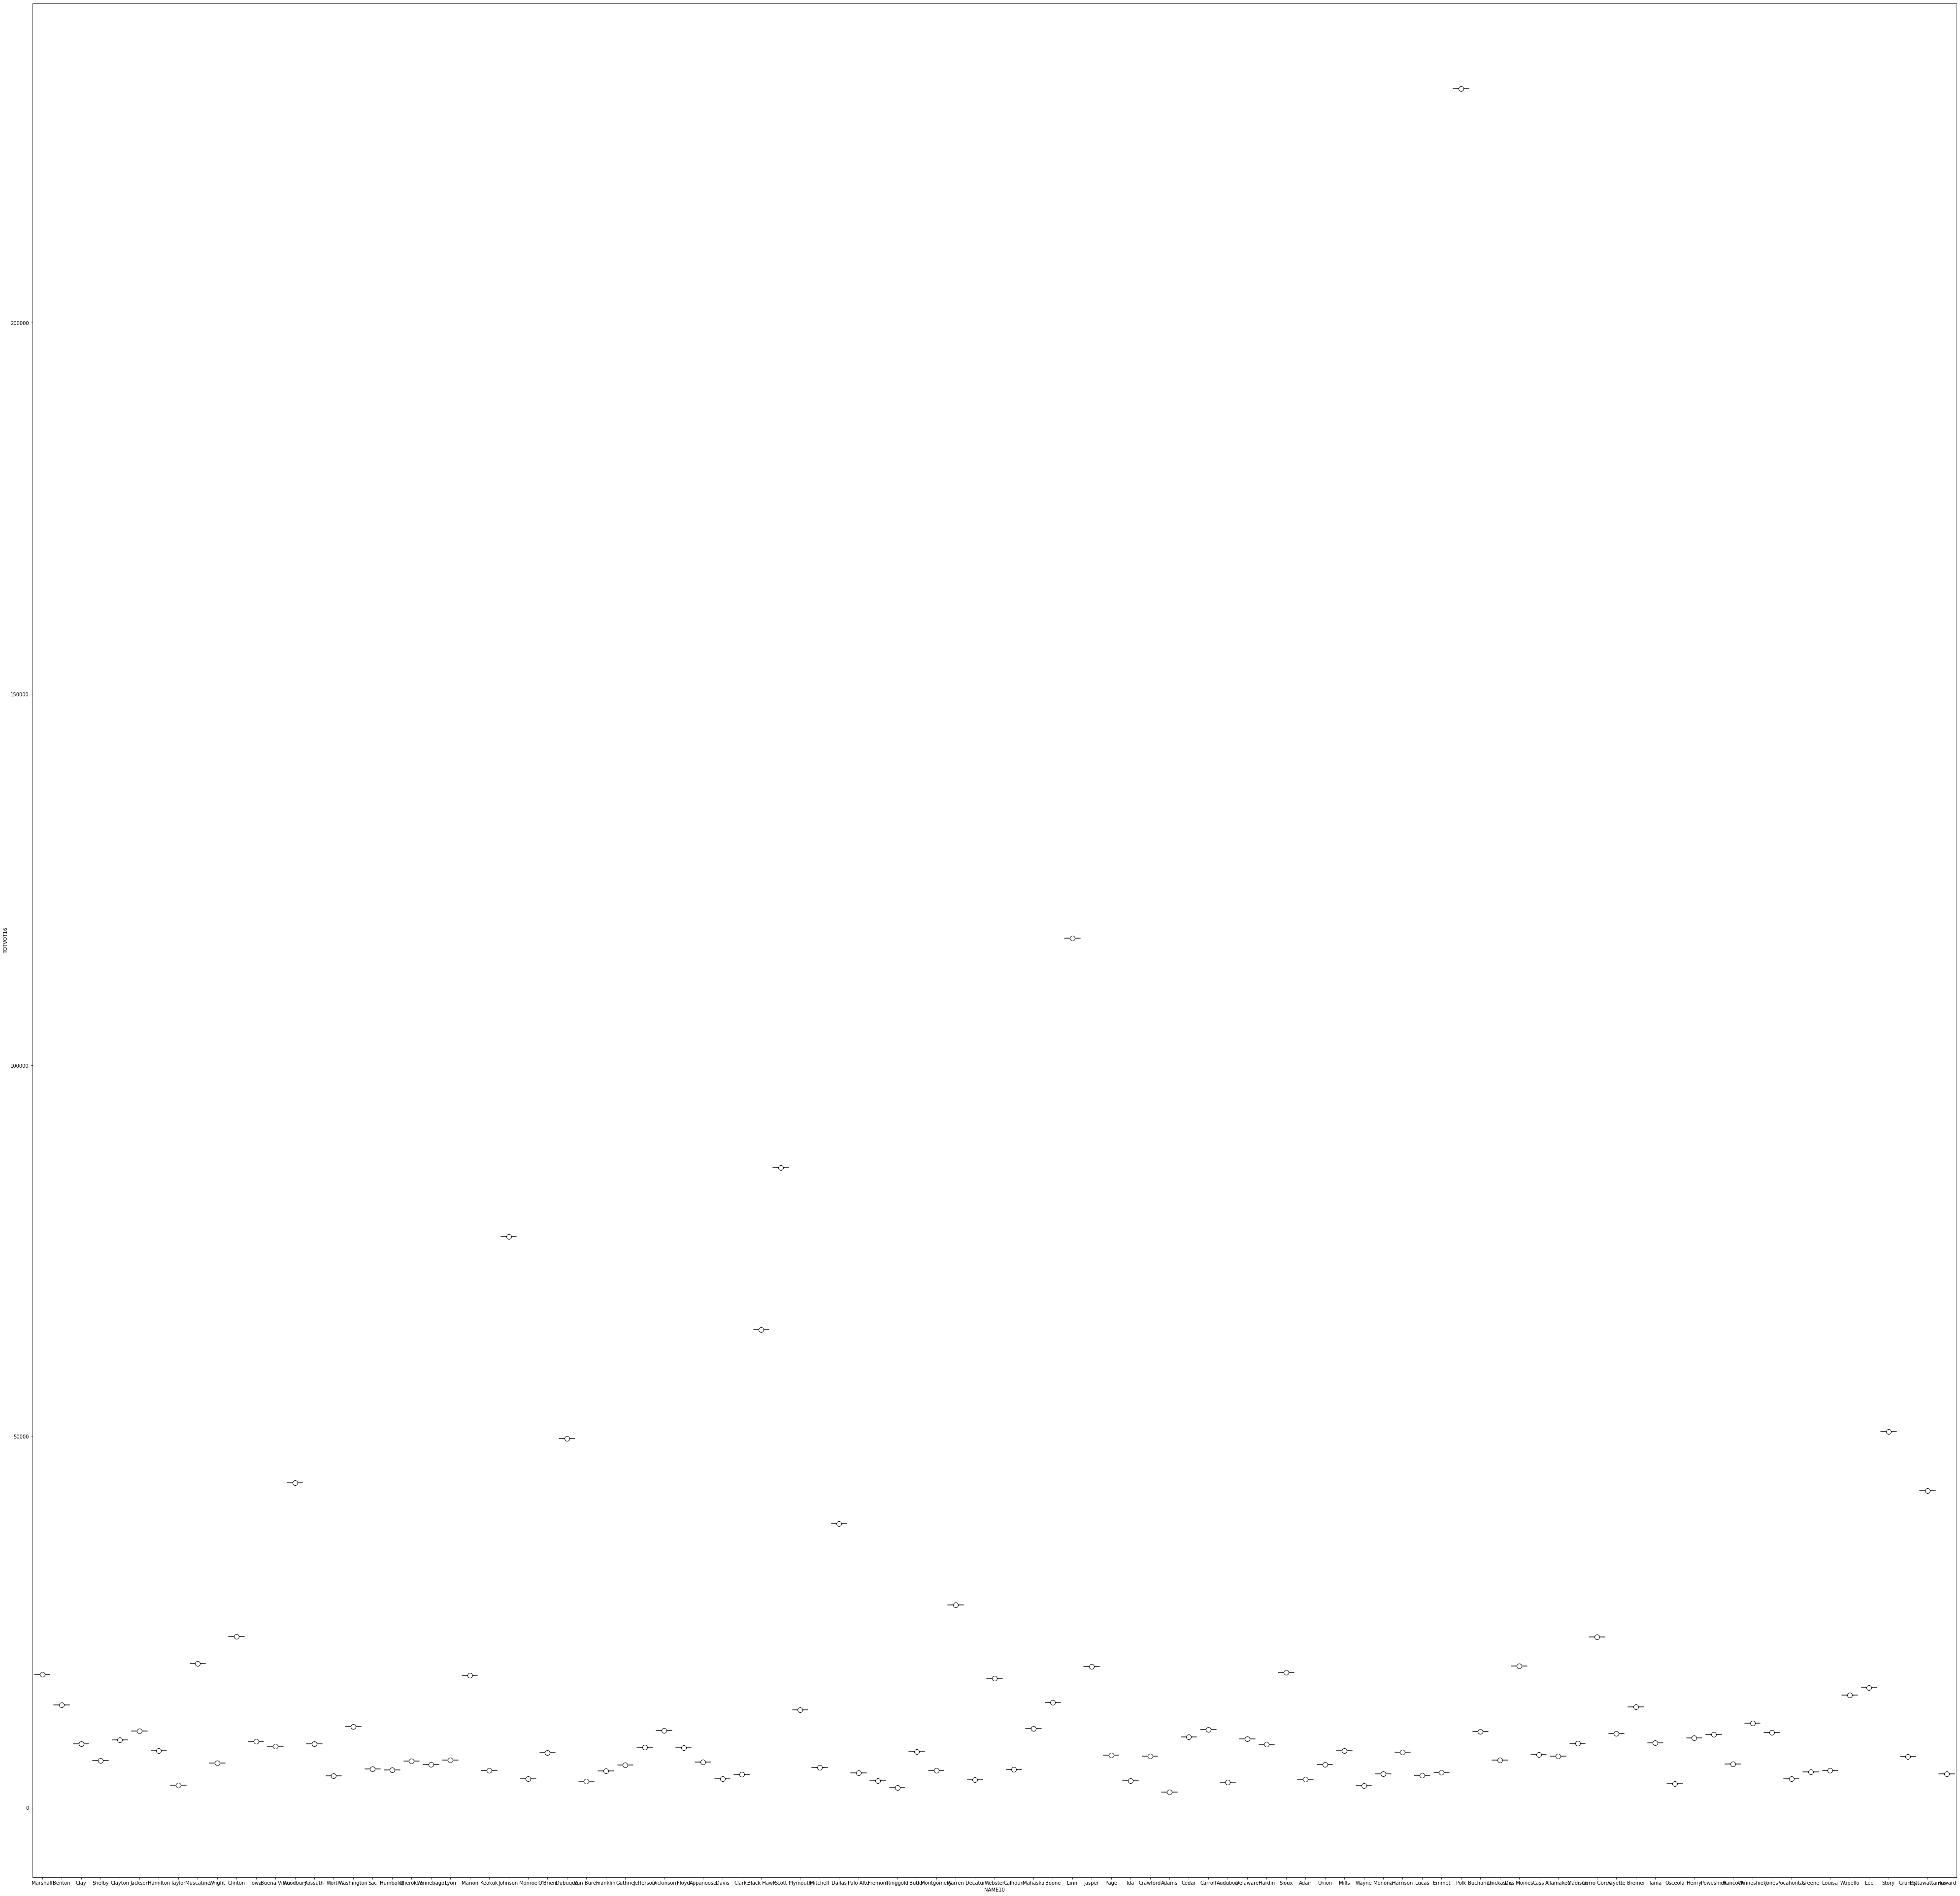

In [39]:
x = "NAME10"
y = "TOTVOT16"
plt.figure(figsize=(70,70,))
ax = sns.boxplot(x = x, y = y, data = df, showmeans = True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
#ax = sns.swarmplot(x = x, y = y, data = df, color = "grey")
plt.show()

In [71]:
#CD_3 = df.loc[df['CD'] == 3, 'NAME10']
#CD_3_df = pd.DataFrame(CD_3)
#CD_3_df
CD_3 = df.loc[df['CD'] == 3]
CD_3

,X,Y,STATEFP10,COUNTYFP10,GEOID10,NAME10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_NHPI,NH_OTHER,NH_2MORE,HISP,H_WHITE,H_BLACK,H_AMIN,H_ASIAN,N_NHPI,H_OTHER,H_2MORE,VAP,HVAP,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,TOTVOT00,PRES00D,PRES00R,PRES00G,PRES00OTH,TOTVOT04,PRES04D,PRES04R,PRES04OTH,TOTVOT08,PRES08D,PRES08R,PRES08OTH,TOTVOT12,PRES12D,PRES12R,PRES12OTH,TOTVOT16,PRES16D,PRES16R,PRES16OTH,CD
7,-94.699931,40.735672,19,173,19173,Taylor,1377618597,7133648,40.737949,-94.697108,6317,5872,12,9,17,0,0,43,364,196,2,0,0,3,147,16,4841,214,4575,7,6,12,0,0,27,3096,1247,1770,46,33,3190,1252,1908,30,3026,1347,1607,72,2995,1262,1683,50,3029,758,2111,160,3
30,-94.512268,41.682719,19,77,19077,Guthrie,1529699184,6355537,41.683573,-94.501272,10954,10595,16,21,37,4,0,79,202,92,0,1,0,0,85,24,8333,114,8130,11,11,26,4,0,37,5469,2493,2840,86,50,5994,2614,3325,55,5847,2625,3074,148,5888,2569,3171,148,5750,1732,3628,390,3
41,-94.047396,41.682719,19,49,19049,Dallas,1524070766,8421379,41.685321,-94.040706,66135,58630,890,94,1652,37,47,726,4059,2341,28,33,10,2,1362,283,46914,2303,42593,538,60,1114,27,17,262,19330,8561,10306,320,143,26293,10917,15183,193,32640,15149,16954,537,38116,16576,20988,552,38252,15701,19339,3212,3
43,-95.636165,40.741169,19,71,19071,Fremont,1323872918,14214133,40.743726,-95.599516,7441,7123,32,22,18,1,3,55,187,89,7,1,2,0,76,12,5742,107,5559,17,12,14,1,1,31,3616,1459,2069,63,25,3911,1510,2362,39,3894,1848,1989,57,3668,1637,1972,59,3595,963,2407,225,3
44,-94.243429,40.735461,19,159,19159,Ringgold,1386933932,8721518,40.735334,-94.244251,5131,4966,17,13,16,0,2,26,91,38,0,1,0,0,40,12,3888,47,3796,7,7,15,0,2,14,2692,1246,1369,47,30,2778,1286,1466,26,2689,1236,1401,52,2599,1186,1368,45,2707,753,1824,130,3
46,-95.156203,41.030284,19,137,19137,Montgomery,1098405666,2410460,41.021735,-95.157790,10740,10265,25,35,23,5,1,81,305,195,0,3,0,0,89,18,8229,168,7964,15,23,14,5,1,39,5394,1838,3417,85,54,5556,1899,3601,56,5287,2326,2887,74,5025,1922,3001,102,5044,1314,3436,294,3
47,-93.559238,41.336620,19,181,19181,Warren,1475844938,9125380,41.336768,-93.564366,46225,44266,213,96,249,10,36,456,899,621,3,13,1,1,154,106,34207,492,33146,141,53,155,9,19,192,19653,9521,9621,371,140,23053,10730,12160,163,24880,12299,12144,437,26072,12551,13052,469,27300,10411,14814,2075,3
55,-95.156805,40.738119,19,145,19145,Page,1385494422,1359125,40.739090,-95.144290,15932,14767,344,69,116,4,5,189,438,272,8,17,0,2,109,30,12426,253,11694,240,54,78,4,4,99,7059,2293,4588,125,53,7513,2211,5243,59,7356,2900,4351,105,7079,2613,4348,118,7044,1807,4893,344,3
58,-94.699519,41.028927,19,3,19003,Adams,1096700733,5353423,41.021656,-94.696906,4029,3922,8,18,23,0,0,21,37,31,0,1,1,0,3,1,3180,22,3109,6,17,15,0,0,11,2145,897,1170,51,27,2325,977,1317,31,2206,1118,1046,42,2185,1028,1108,49,2106,565,1395,146,3
65,-94.470741,41.330774,19,1,19001,Adair,1474404167,2597997,41.328528,-94.478164,7682,7507,11,4,22,1,2,34,101,51,0,0,0,0,32,18,5957,53,5860,5,3,18,1,1,16,4123,1753,2275,66,29,4278,1844,2402,32,4053,1924,2060,69,3996,1790,2114,92,3811,1133,2461,217,3


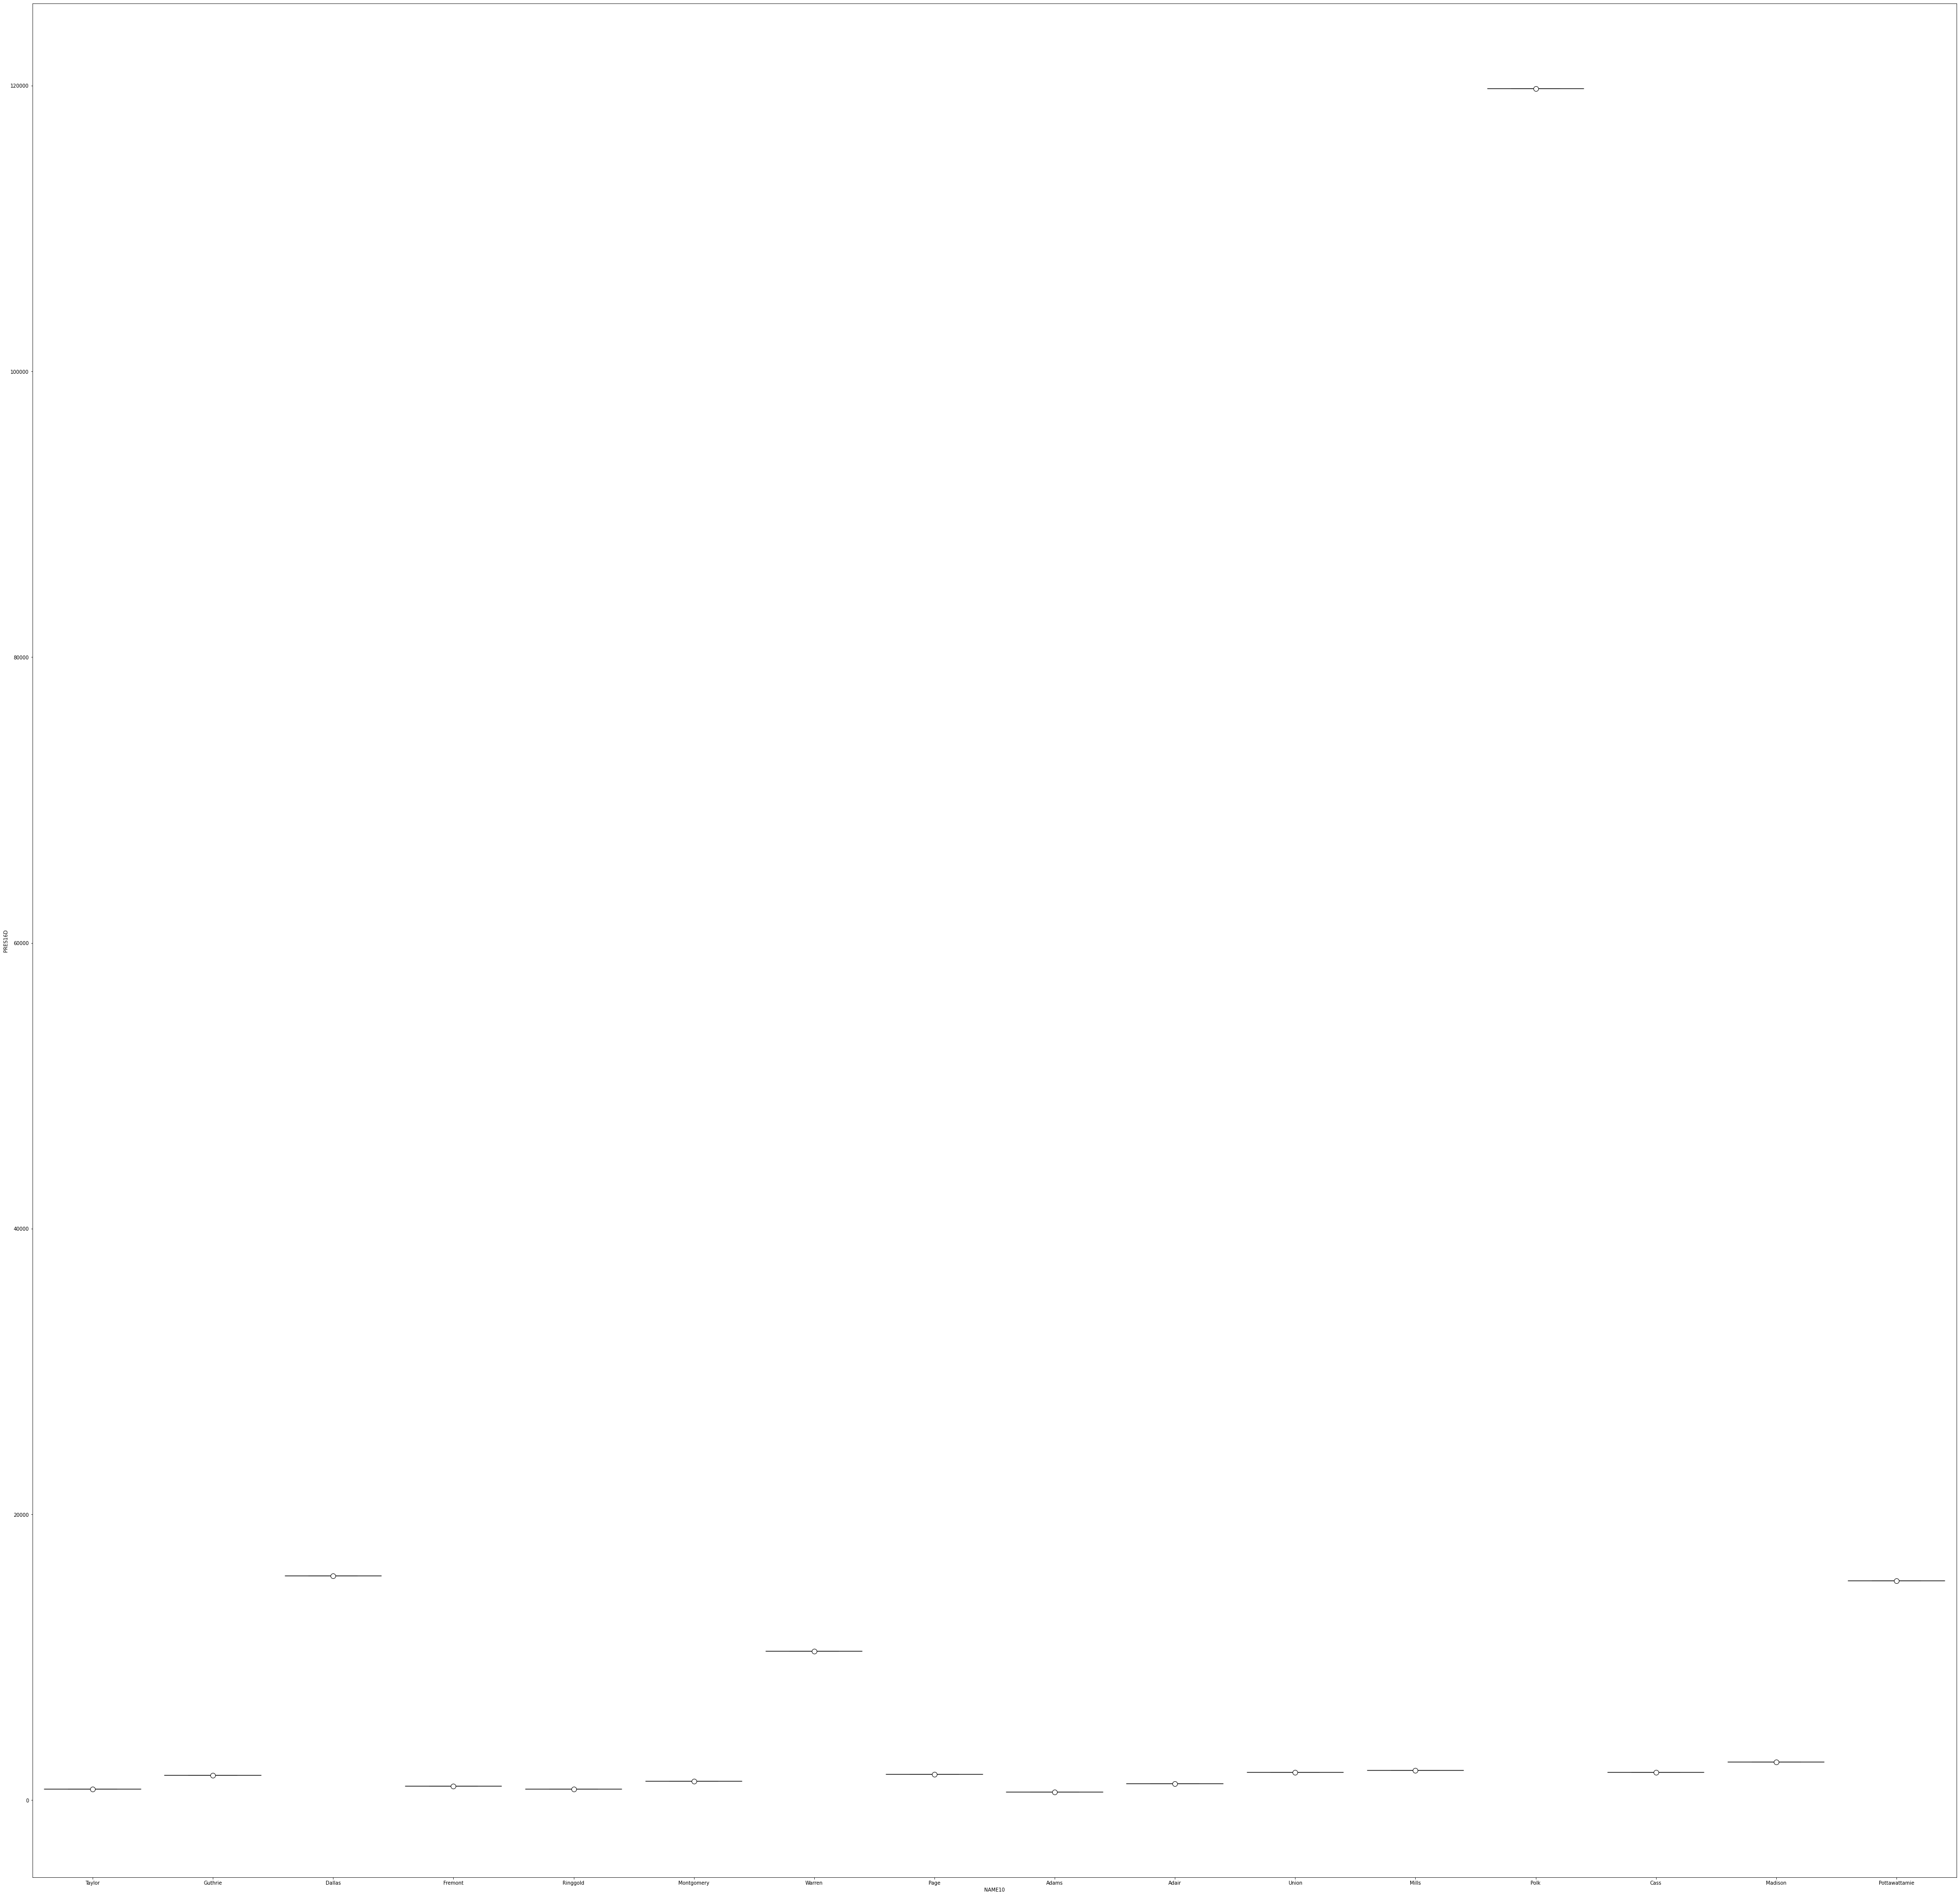

In [76]:
x = "NAME10"
y = "PRES16D"
plt.figure(figsize=(70,70,))
ax = sns.boxplot(x = x, y = y, data = CD_3, showmeans = True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

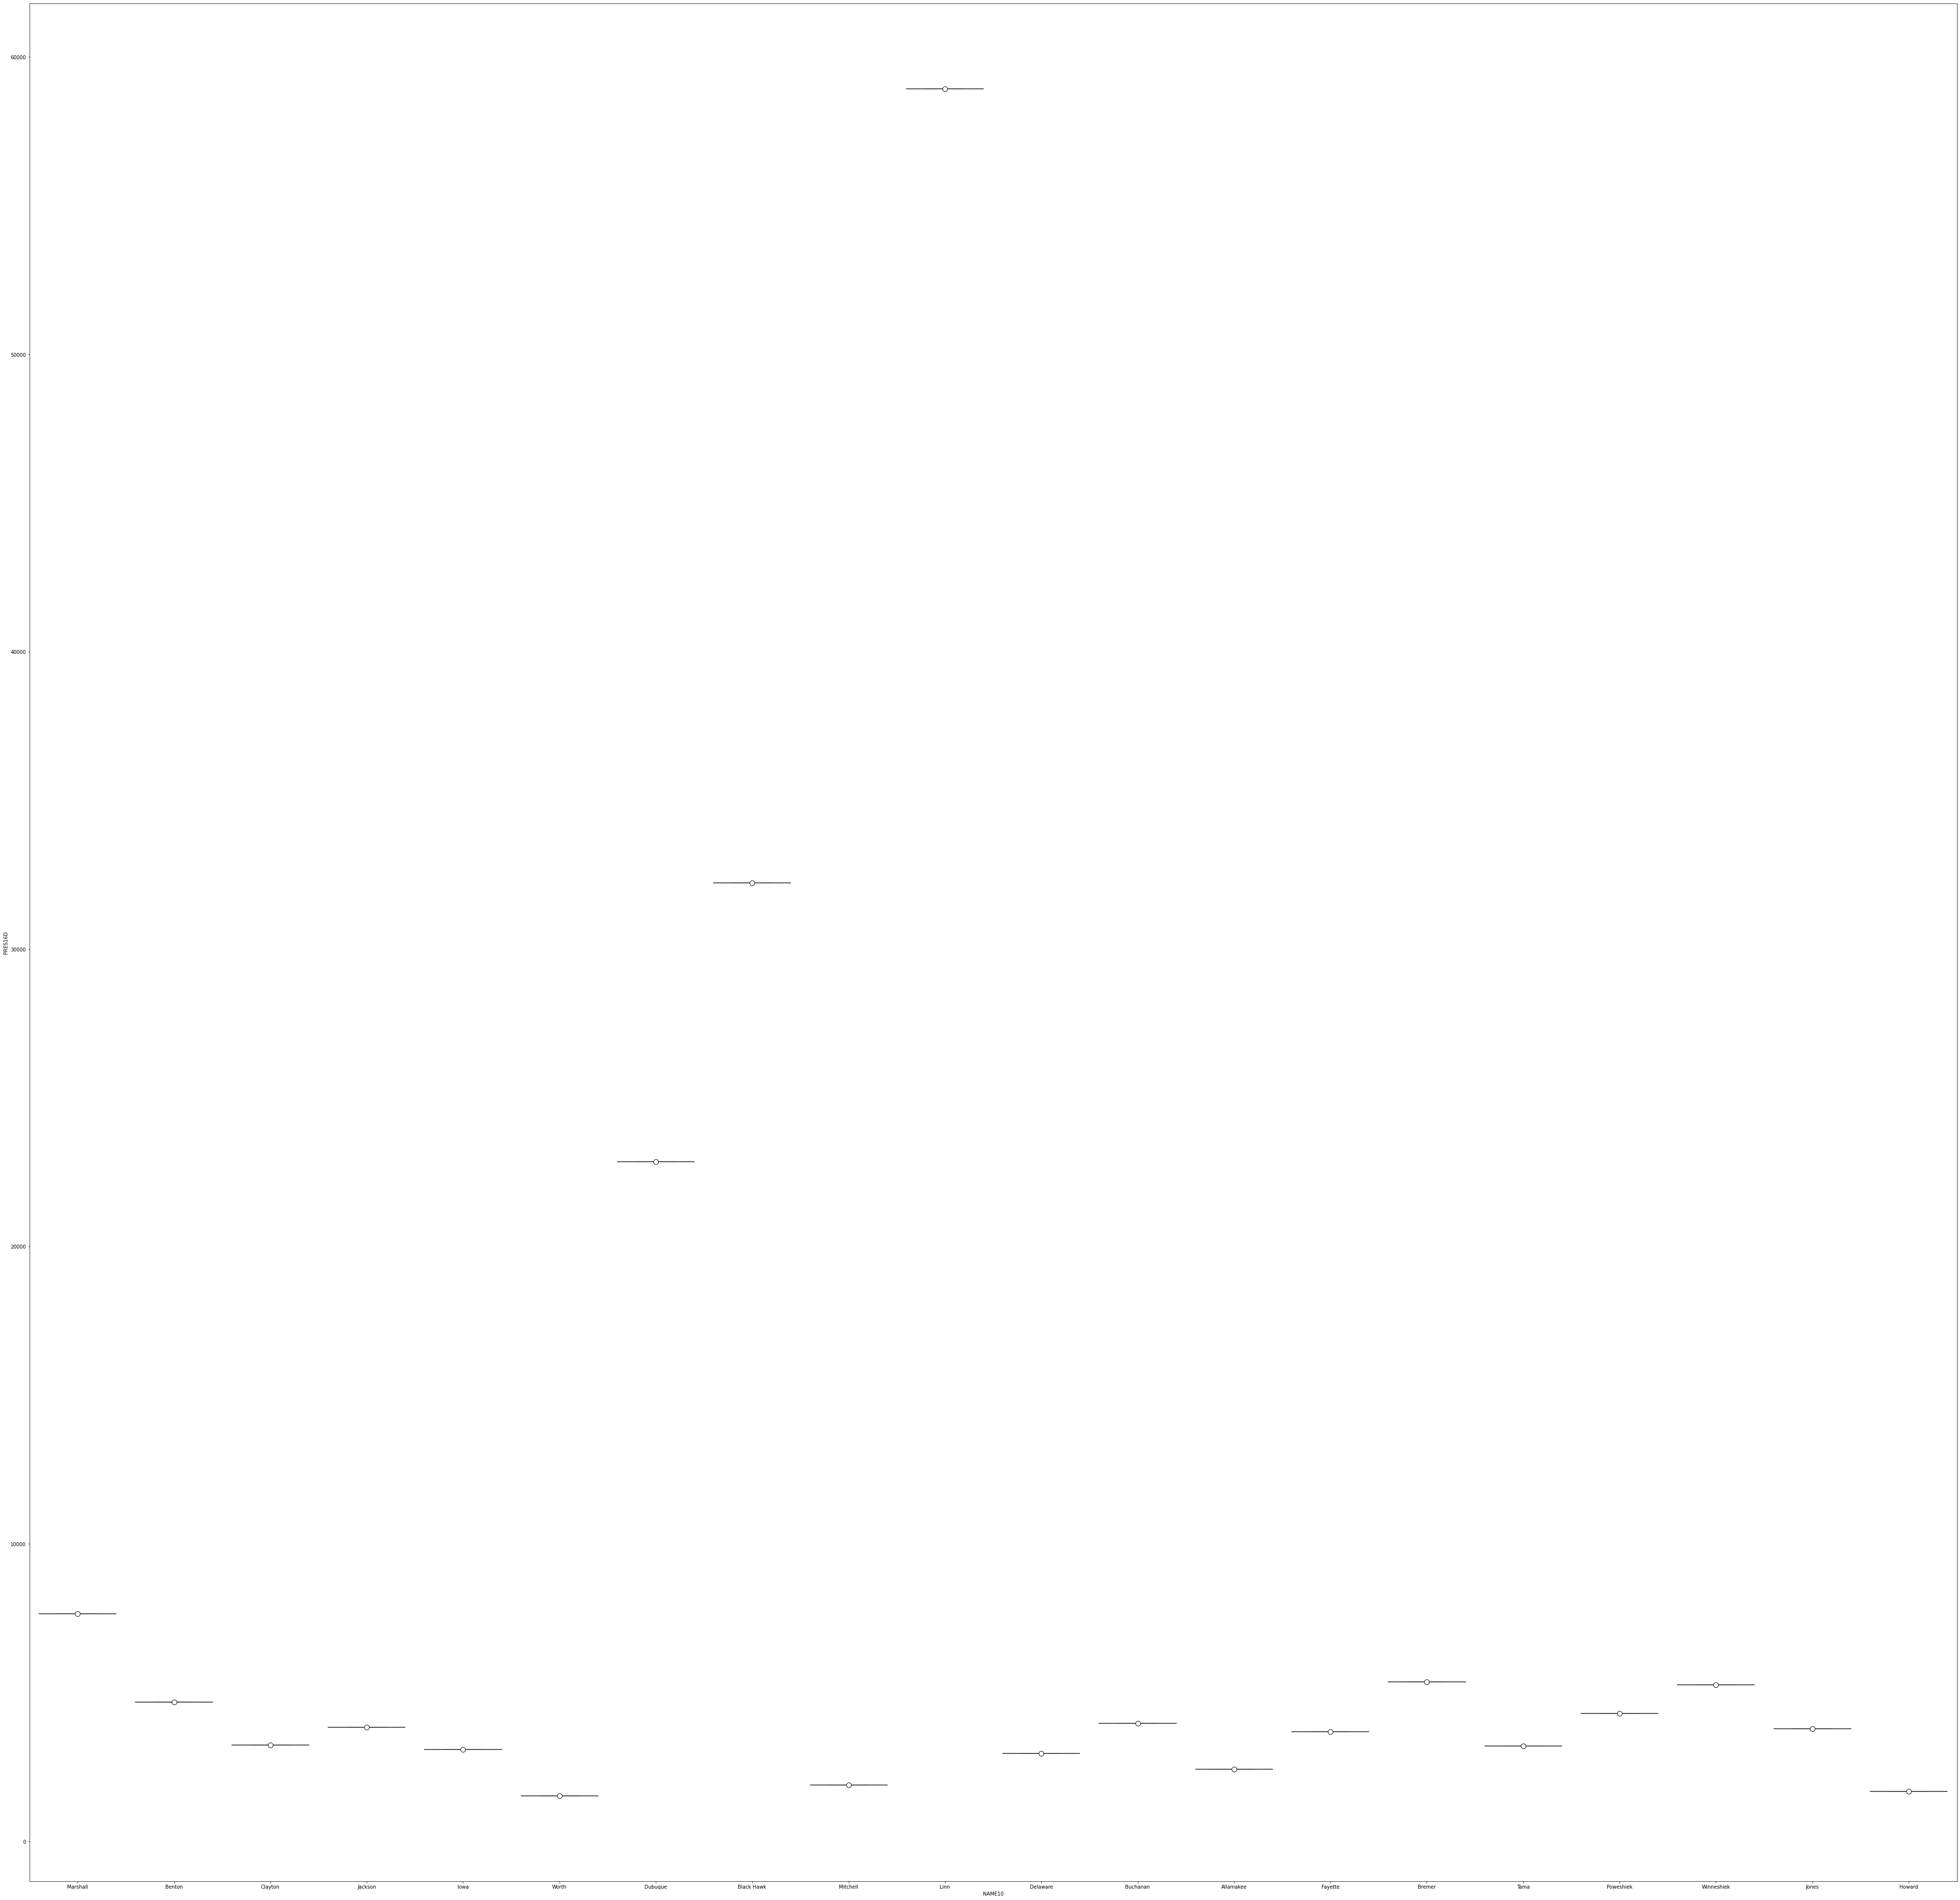

In [77]:
CD_1 = df.loc[df['CD'] == 1]
x = "NAME10"
y = "PRES16D"
plt.figure(figsize=(70,70,))
ax = sns.boxplot(x = x, y = y, data = CD_1, showmeans = True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

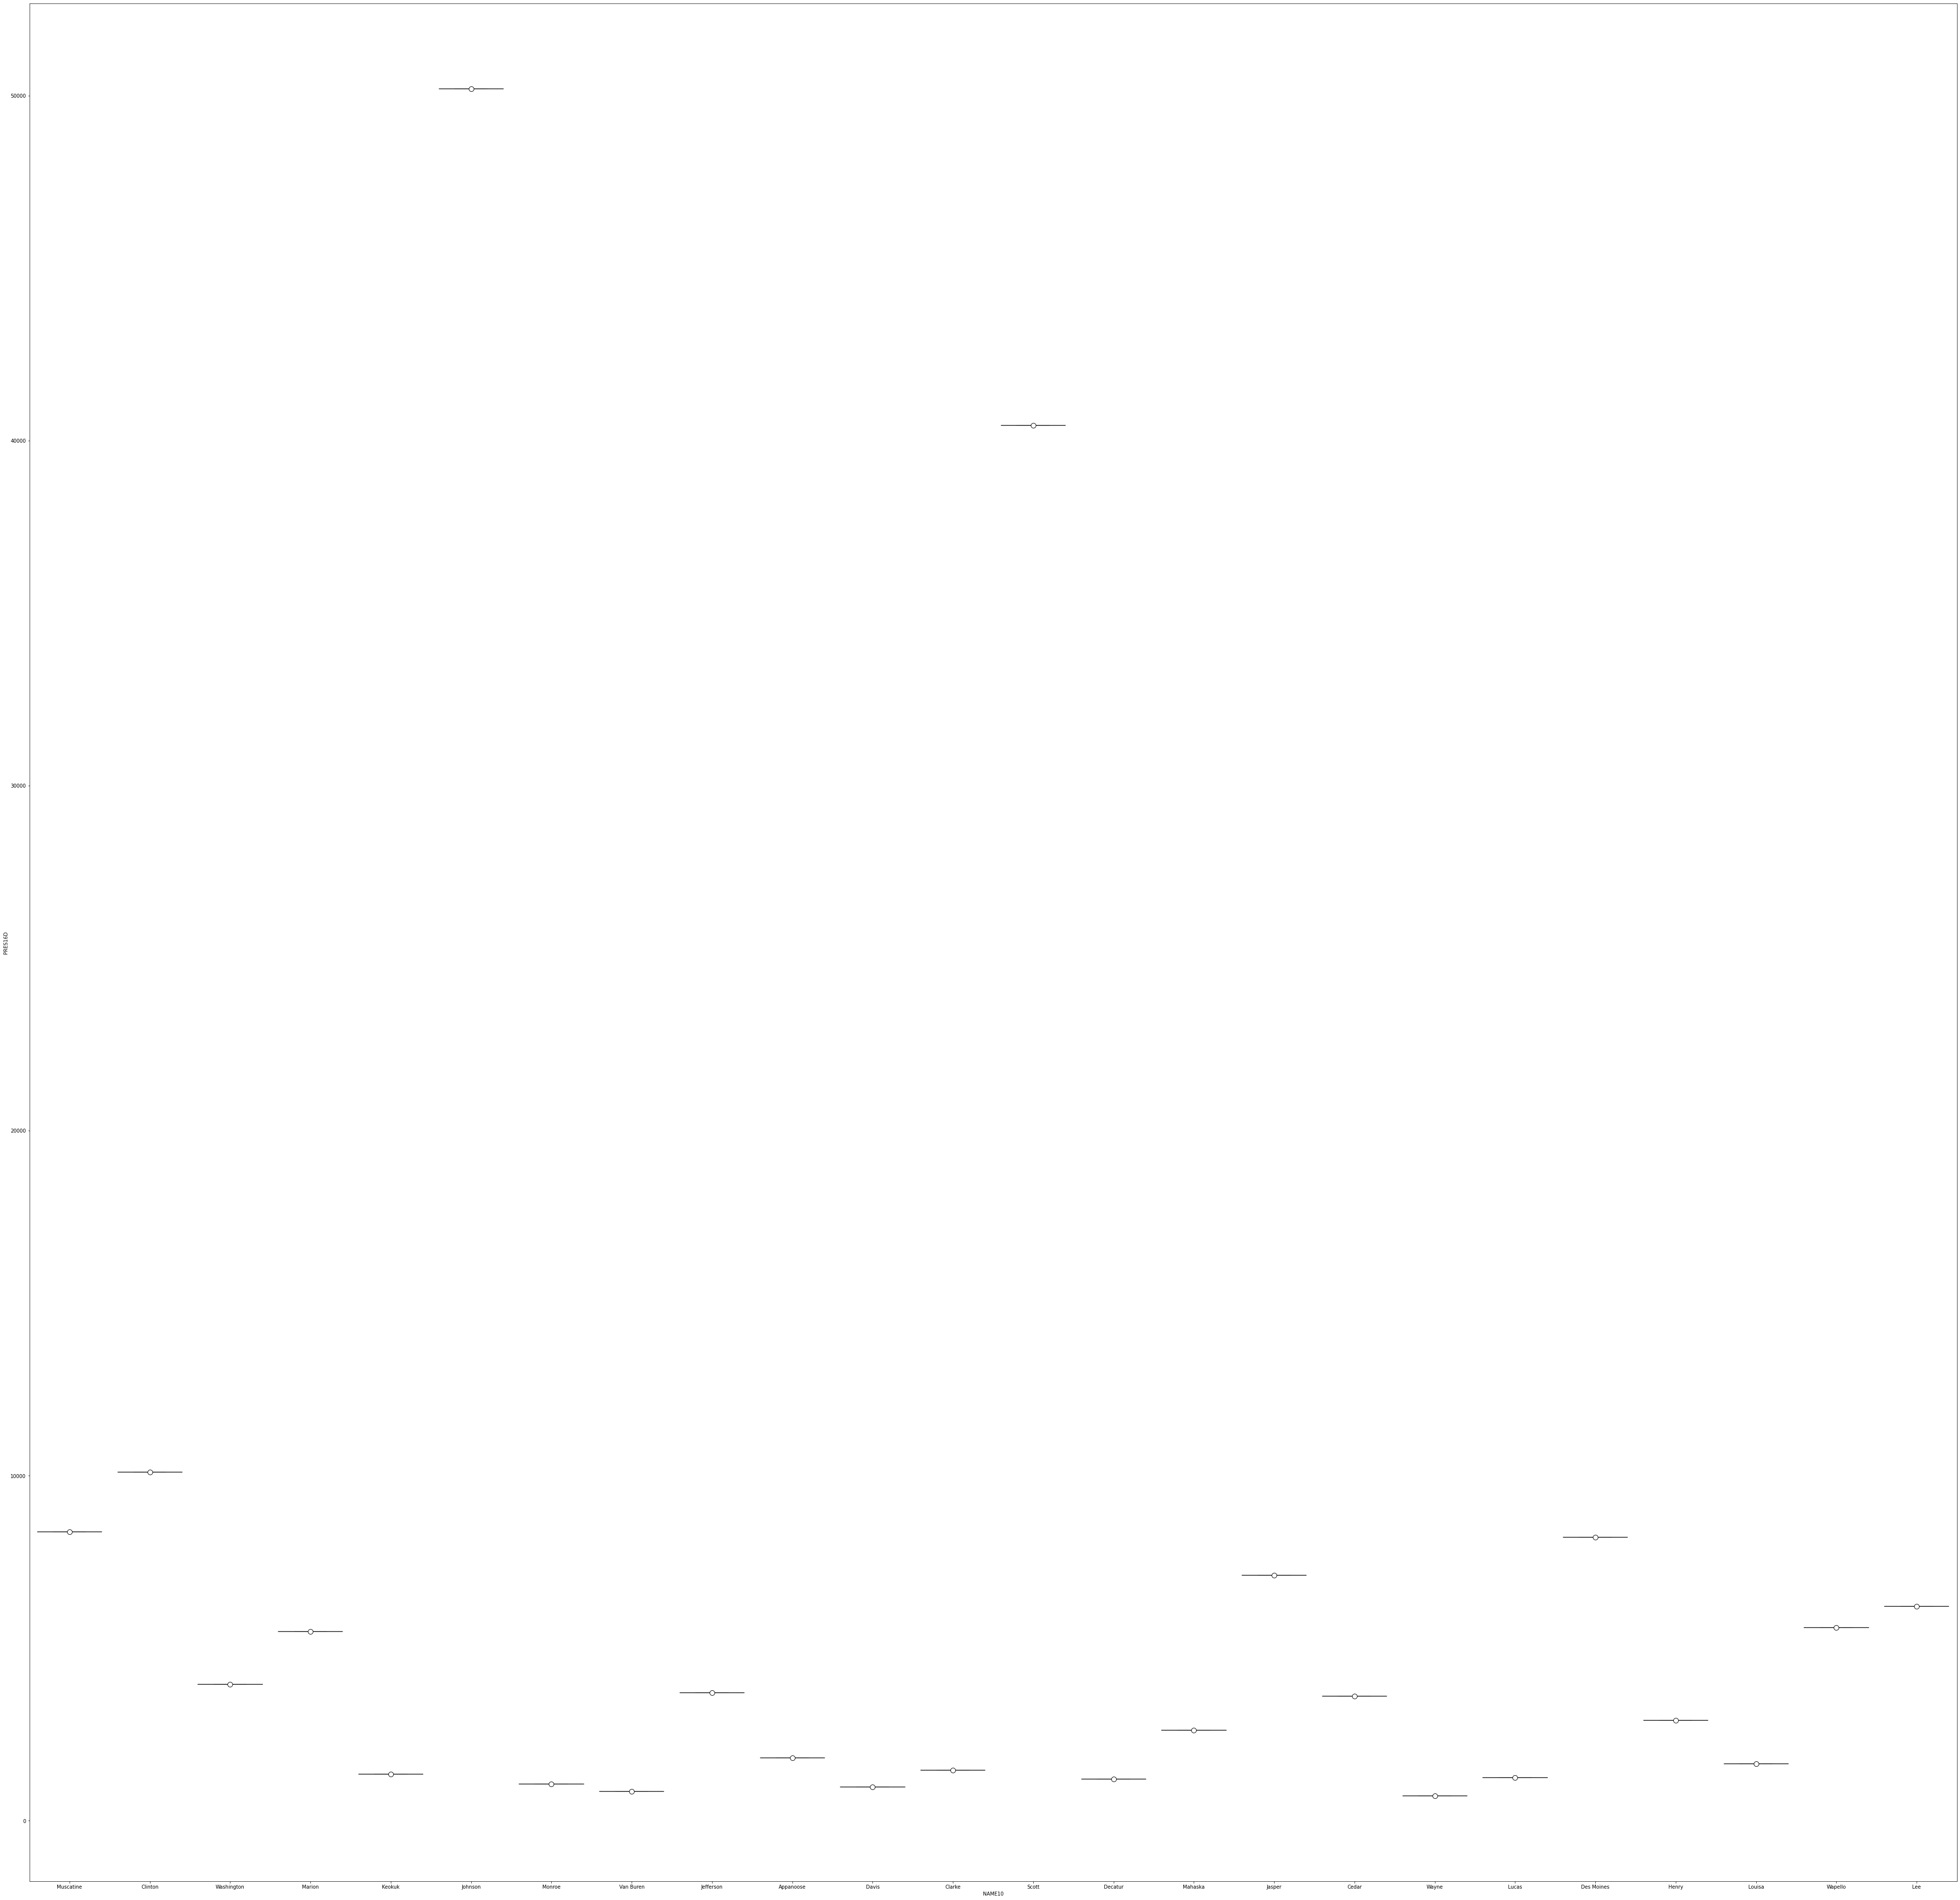

In [78]:
CD_2 = df.loc[df['CD'] == 2]
x = "NAME10"
y = "PRES16D"
plt.figure(figsize=(70,70,))
ax = sns.boxplot(x = x, y = y, data = CD_2, showmeans = True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

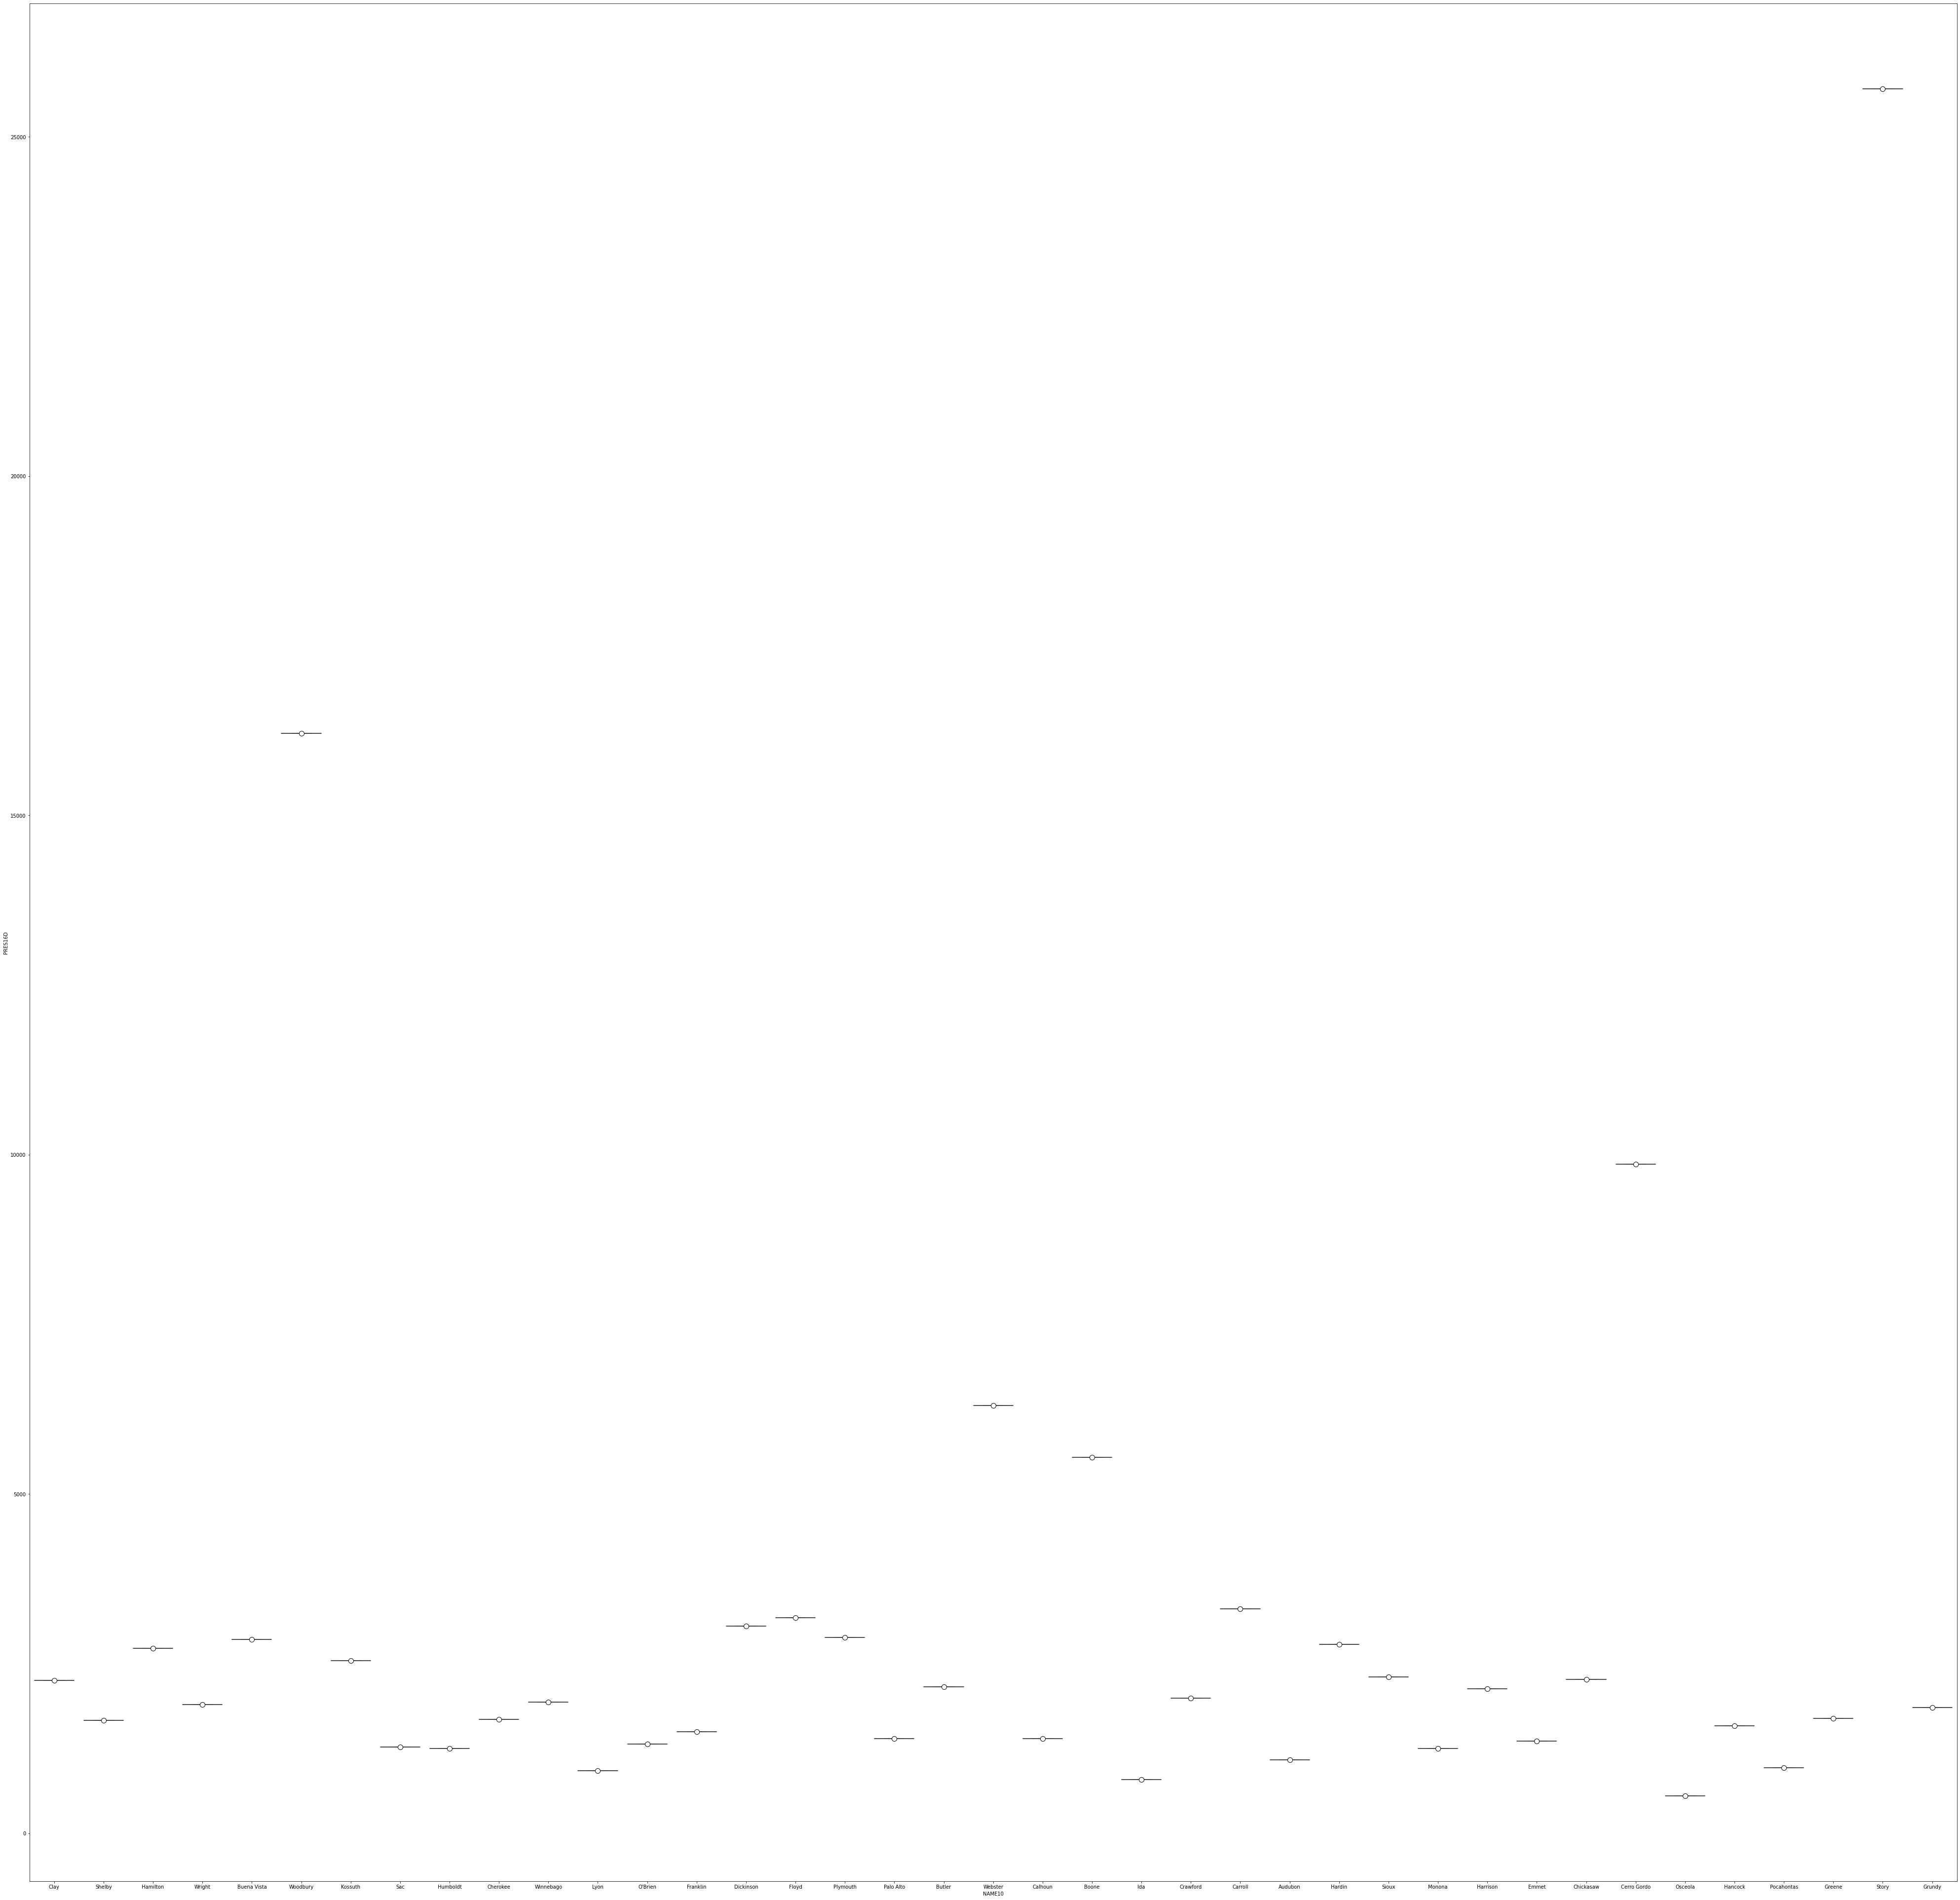

In [79]:
CD_4 = df.loc[df['CD'] == 4]
x = "NAME10"
y = "PRES16D"
plt.figure(figsize=(70,70,))
ax = sns.boxplot(x = x, y = y, data = CD_4, showmeans = True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

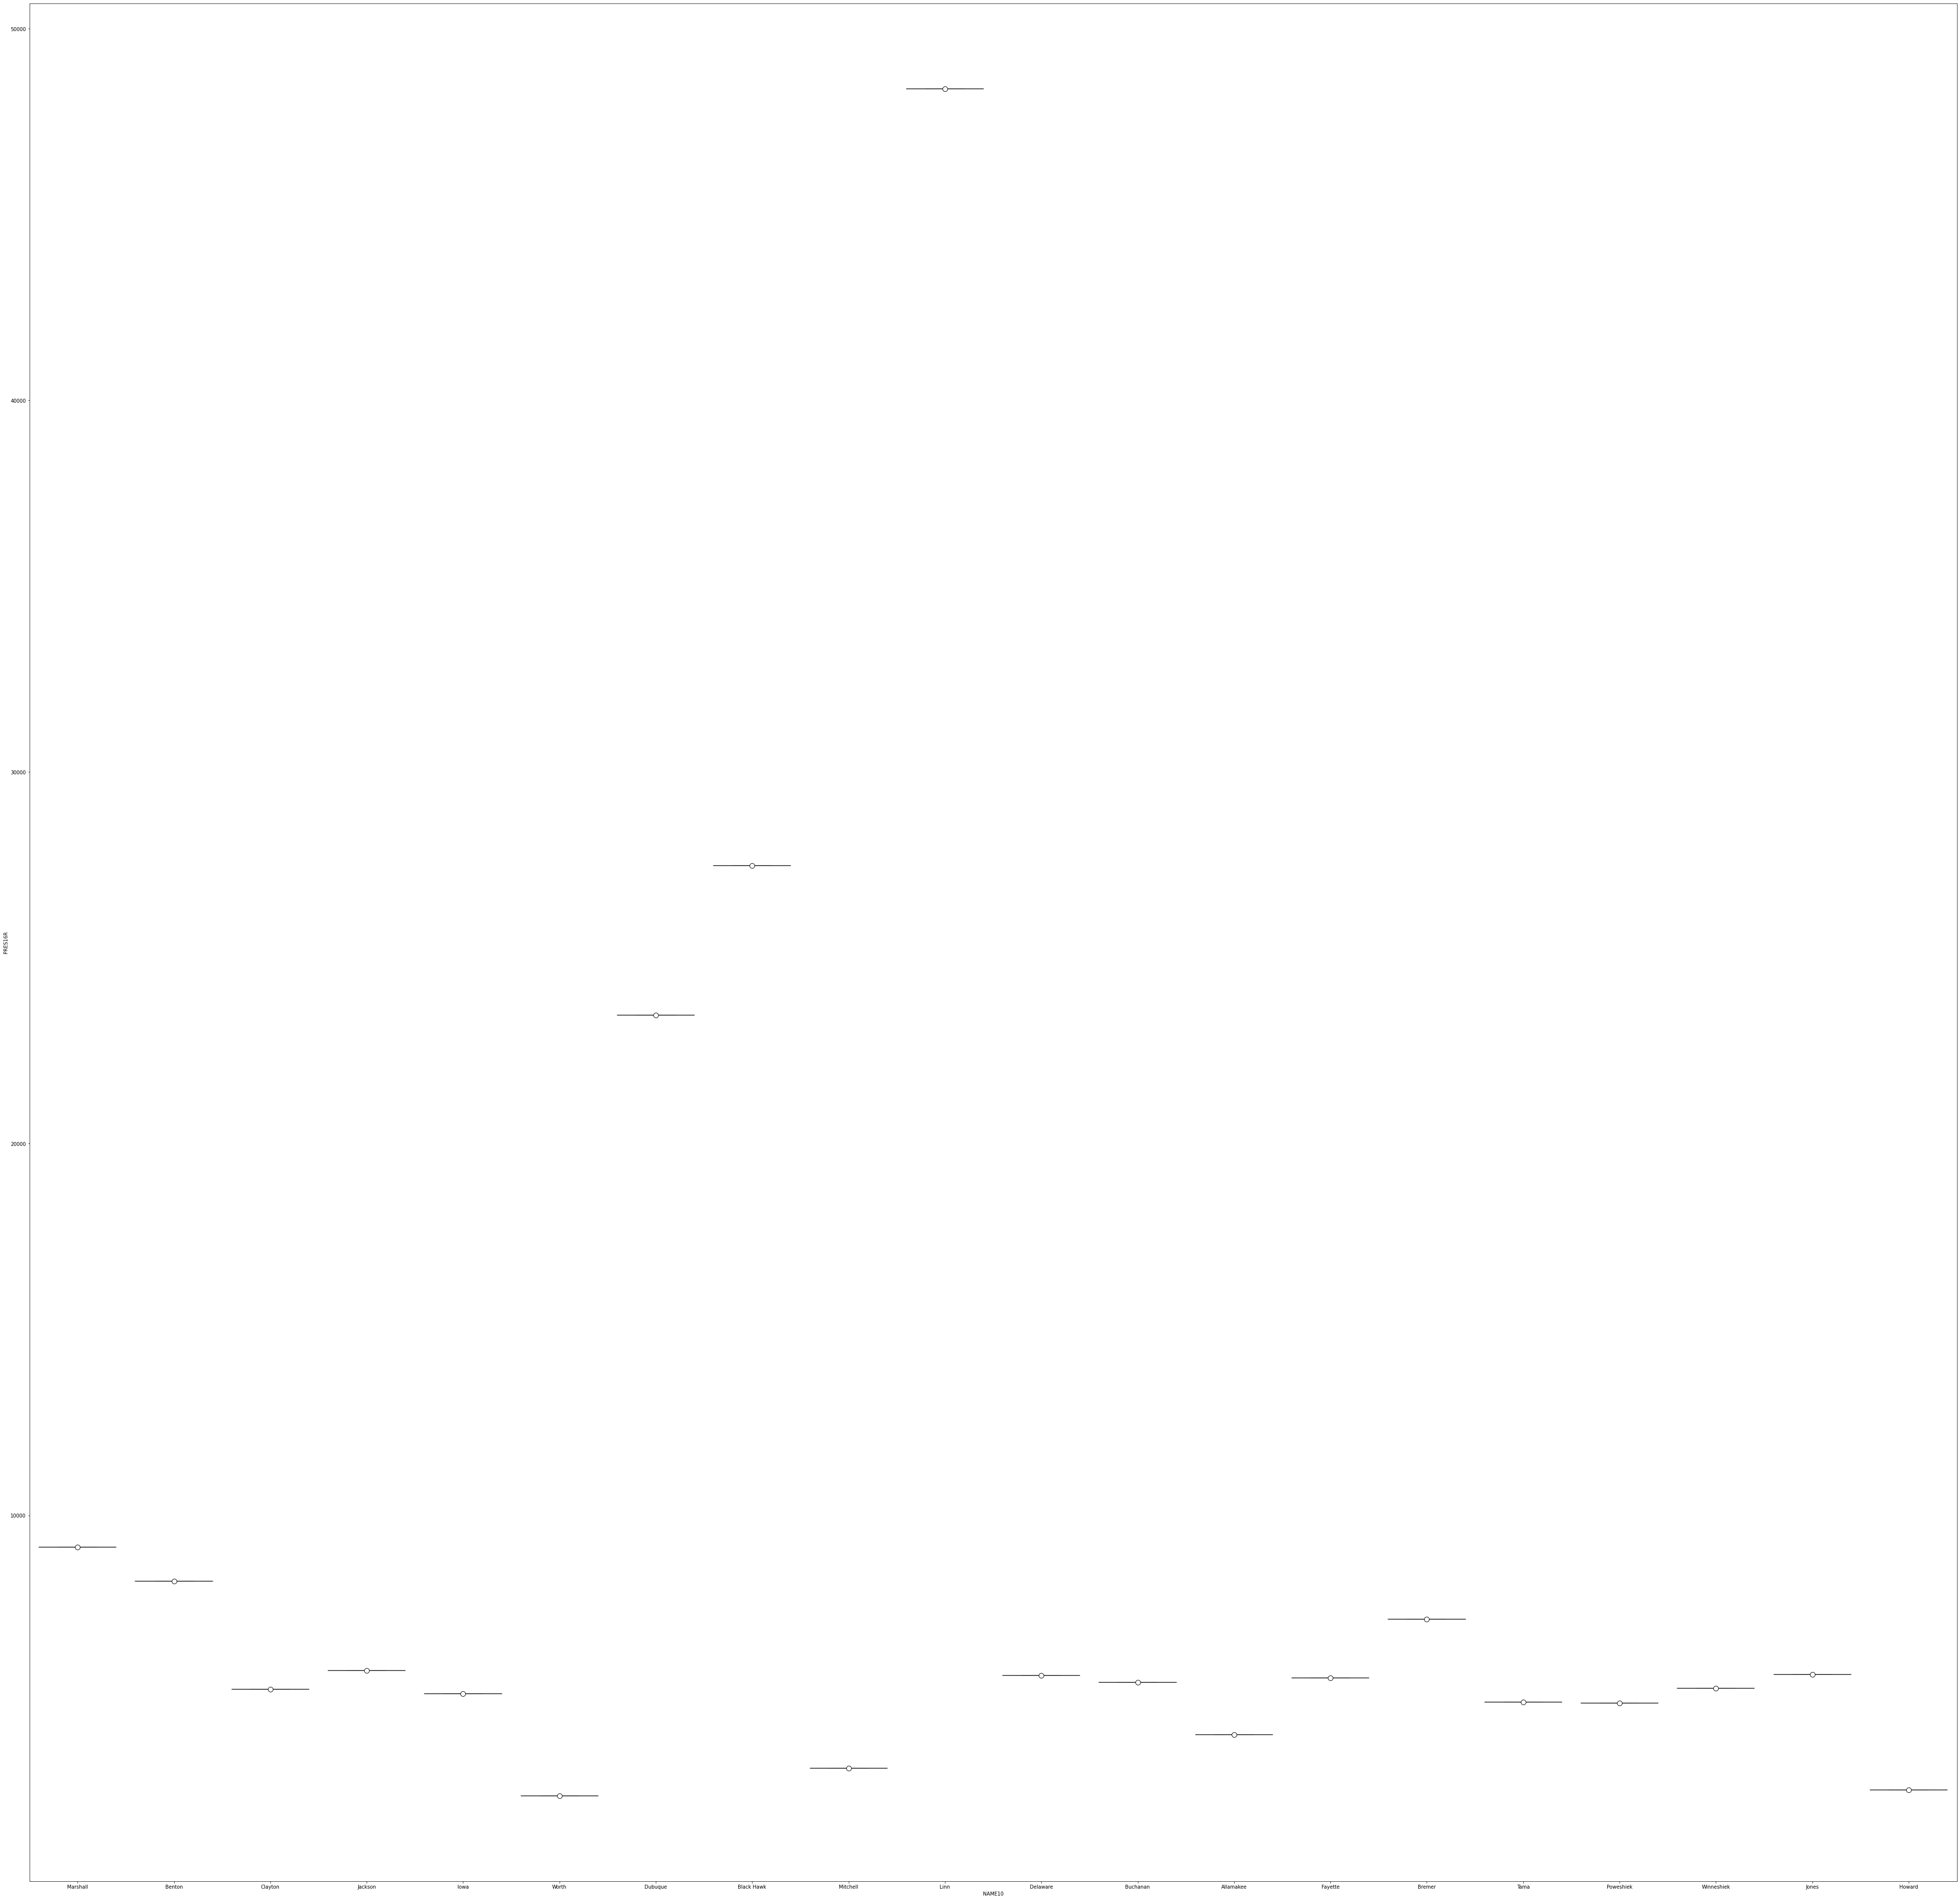

In [80]:
x = "NAME10"
y = "PRES16R"
plt.figure(figsize=(70,70,))
ax = sns.boxplot(x = x, y = y, data = CD_1, showmeans = True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

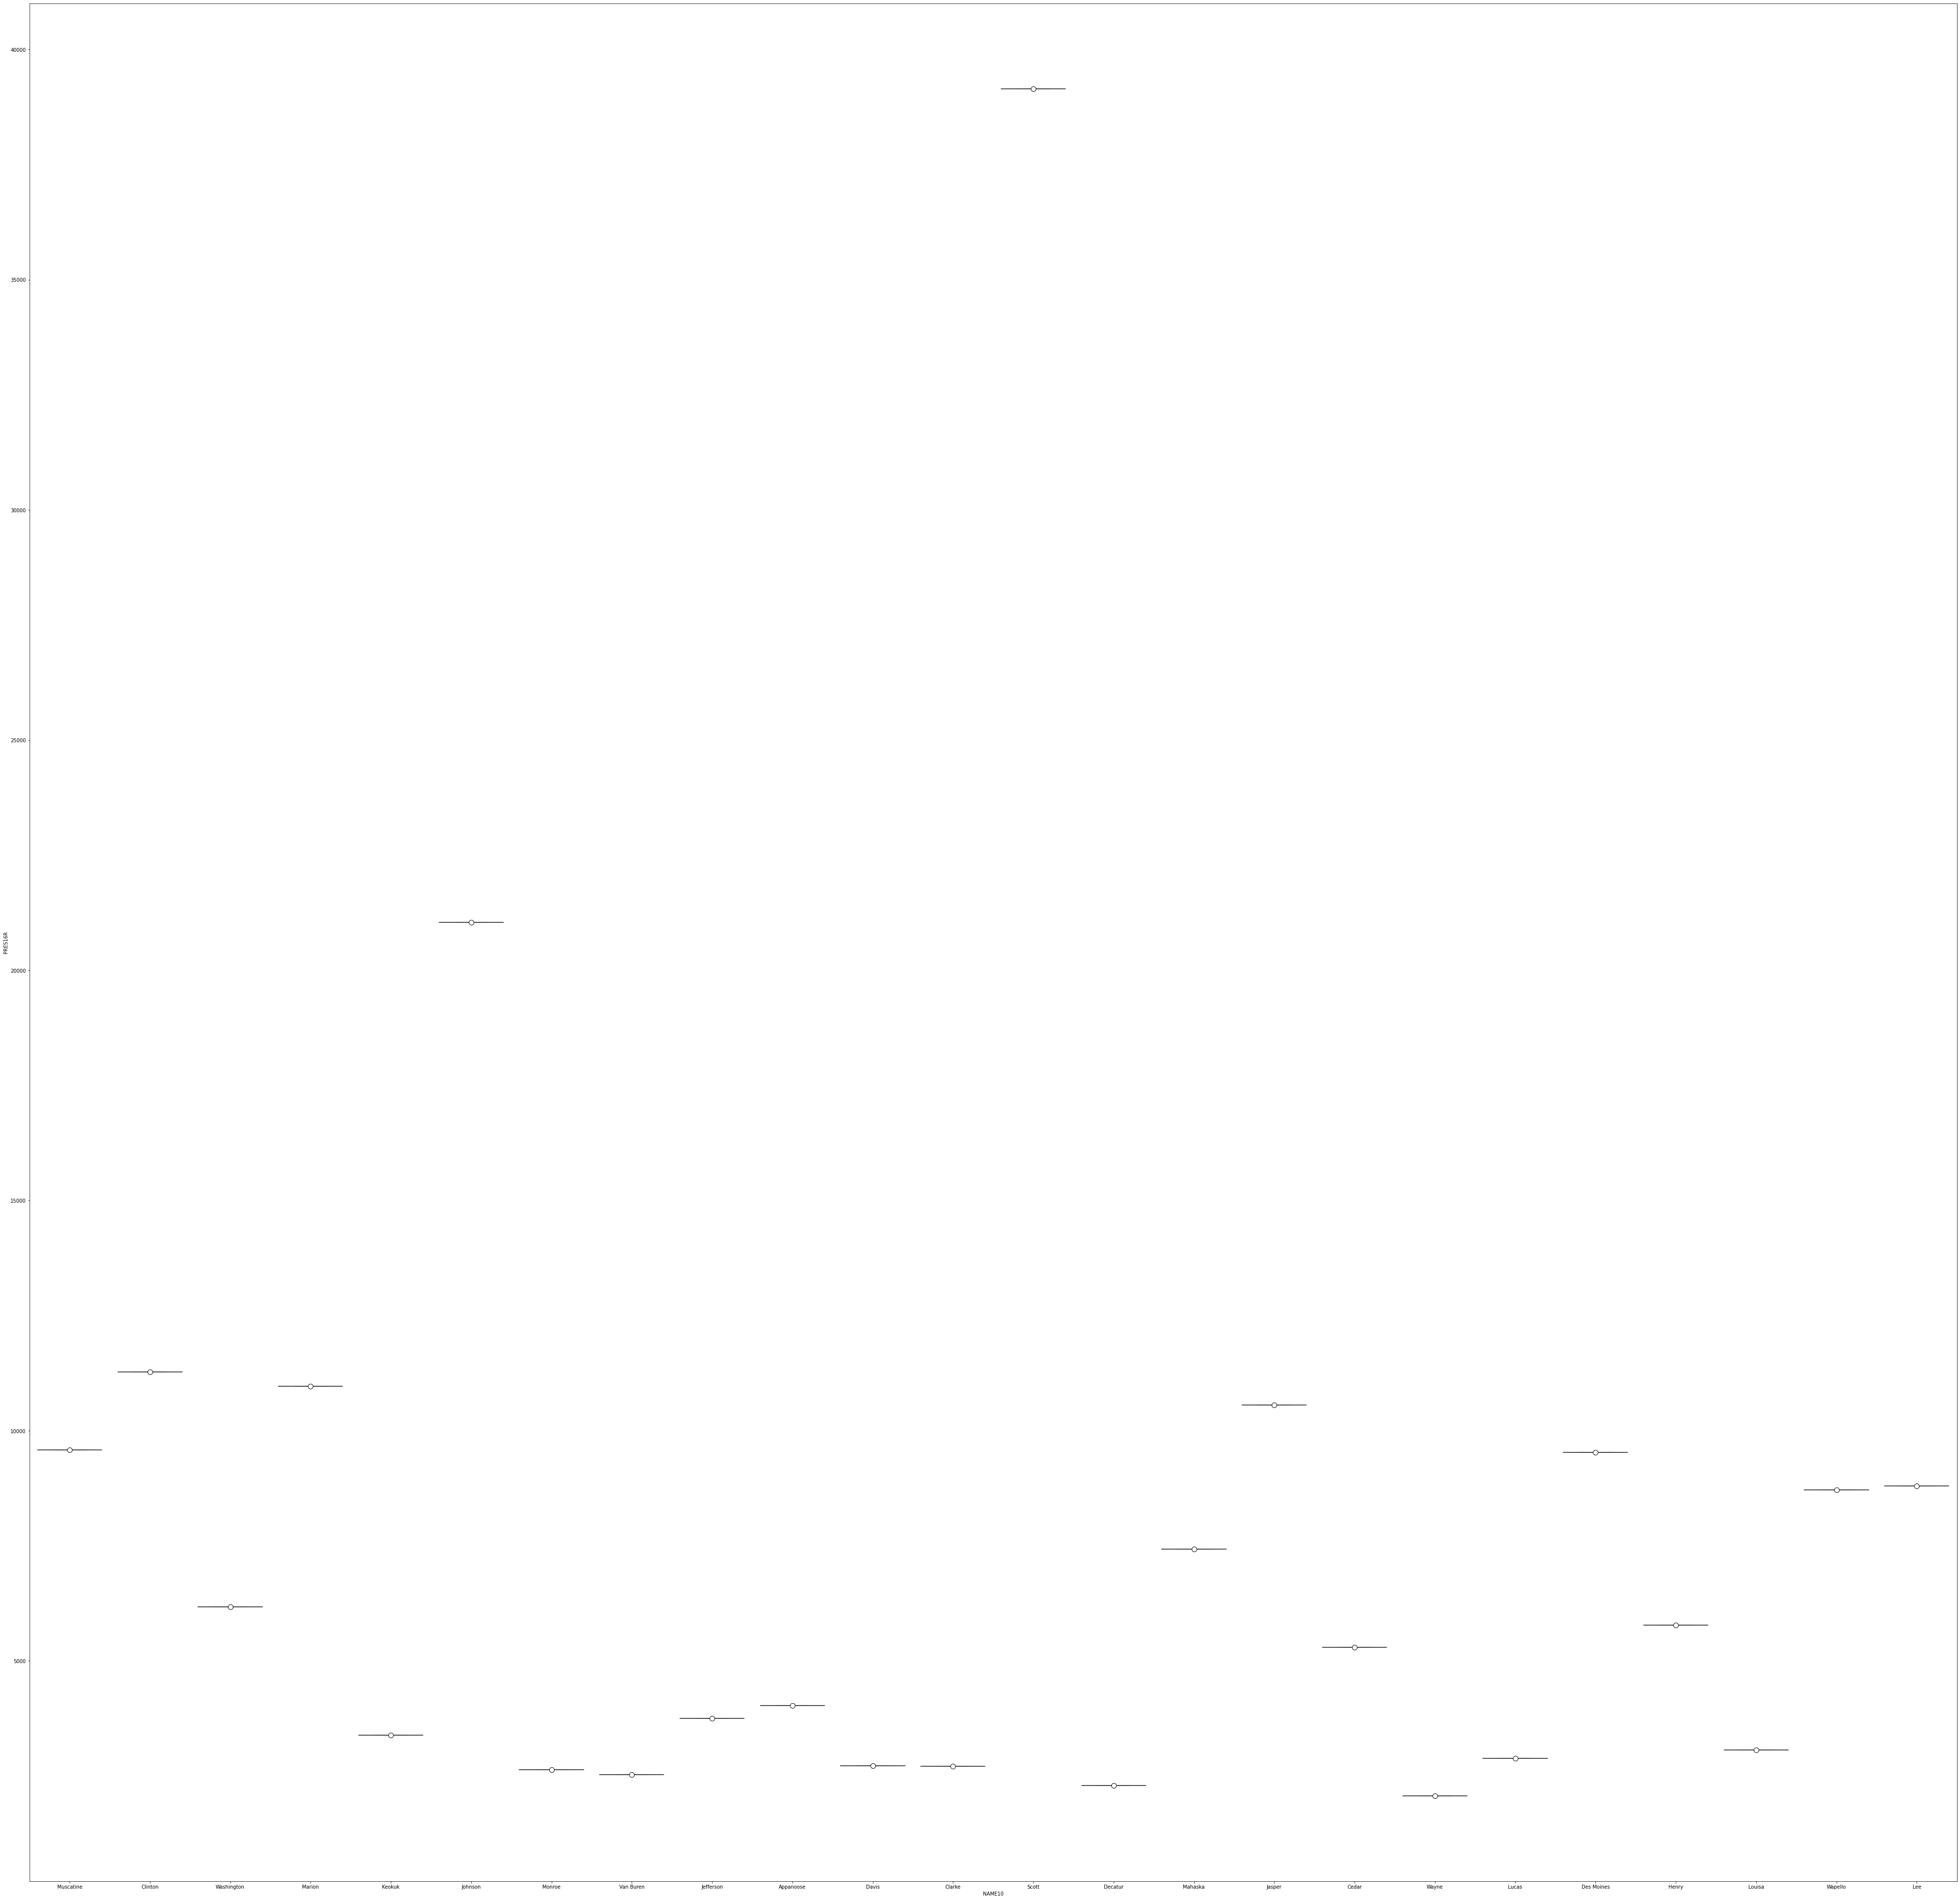

In [82]:
x = "NAME10"
y = "PRES16R"
plt.figure(figsize=(70,70,))
ax = sns.boxplot(x = x, y = y, data = CD_2, showmeans = True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

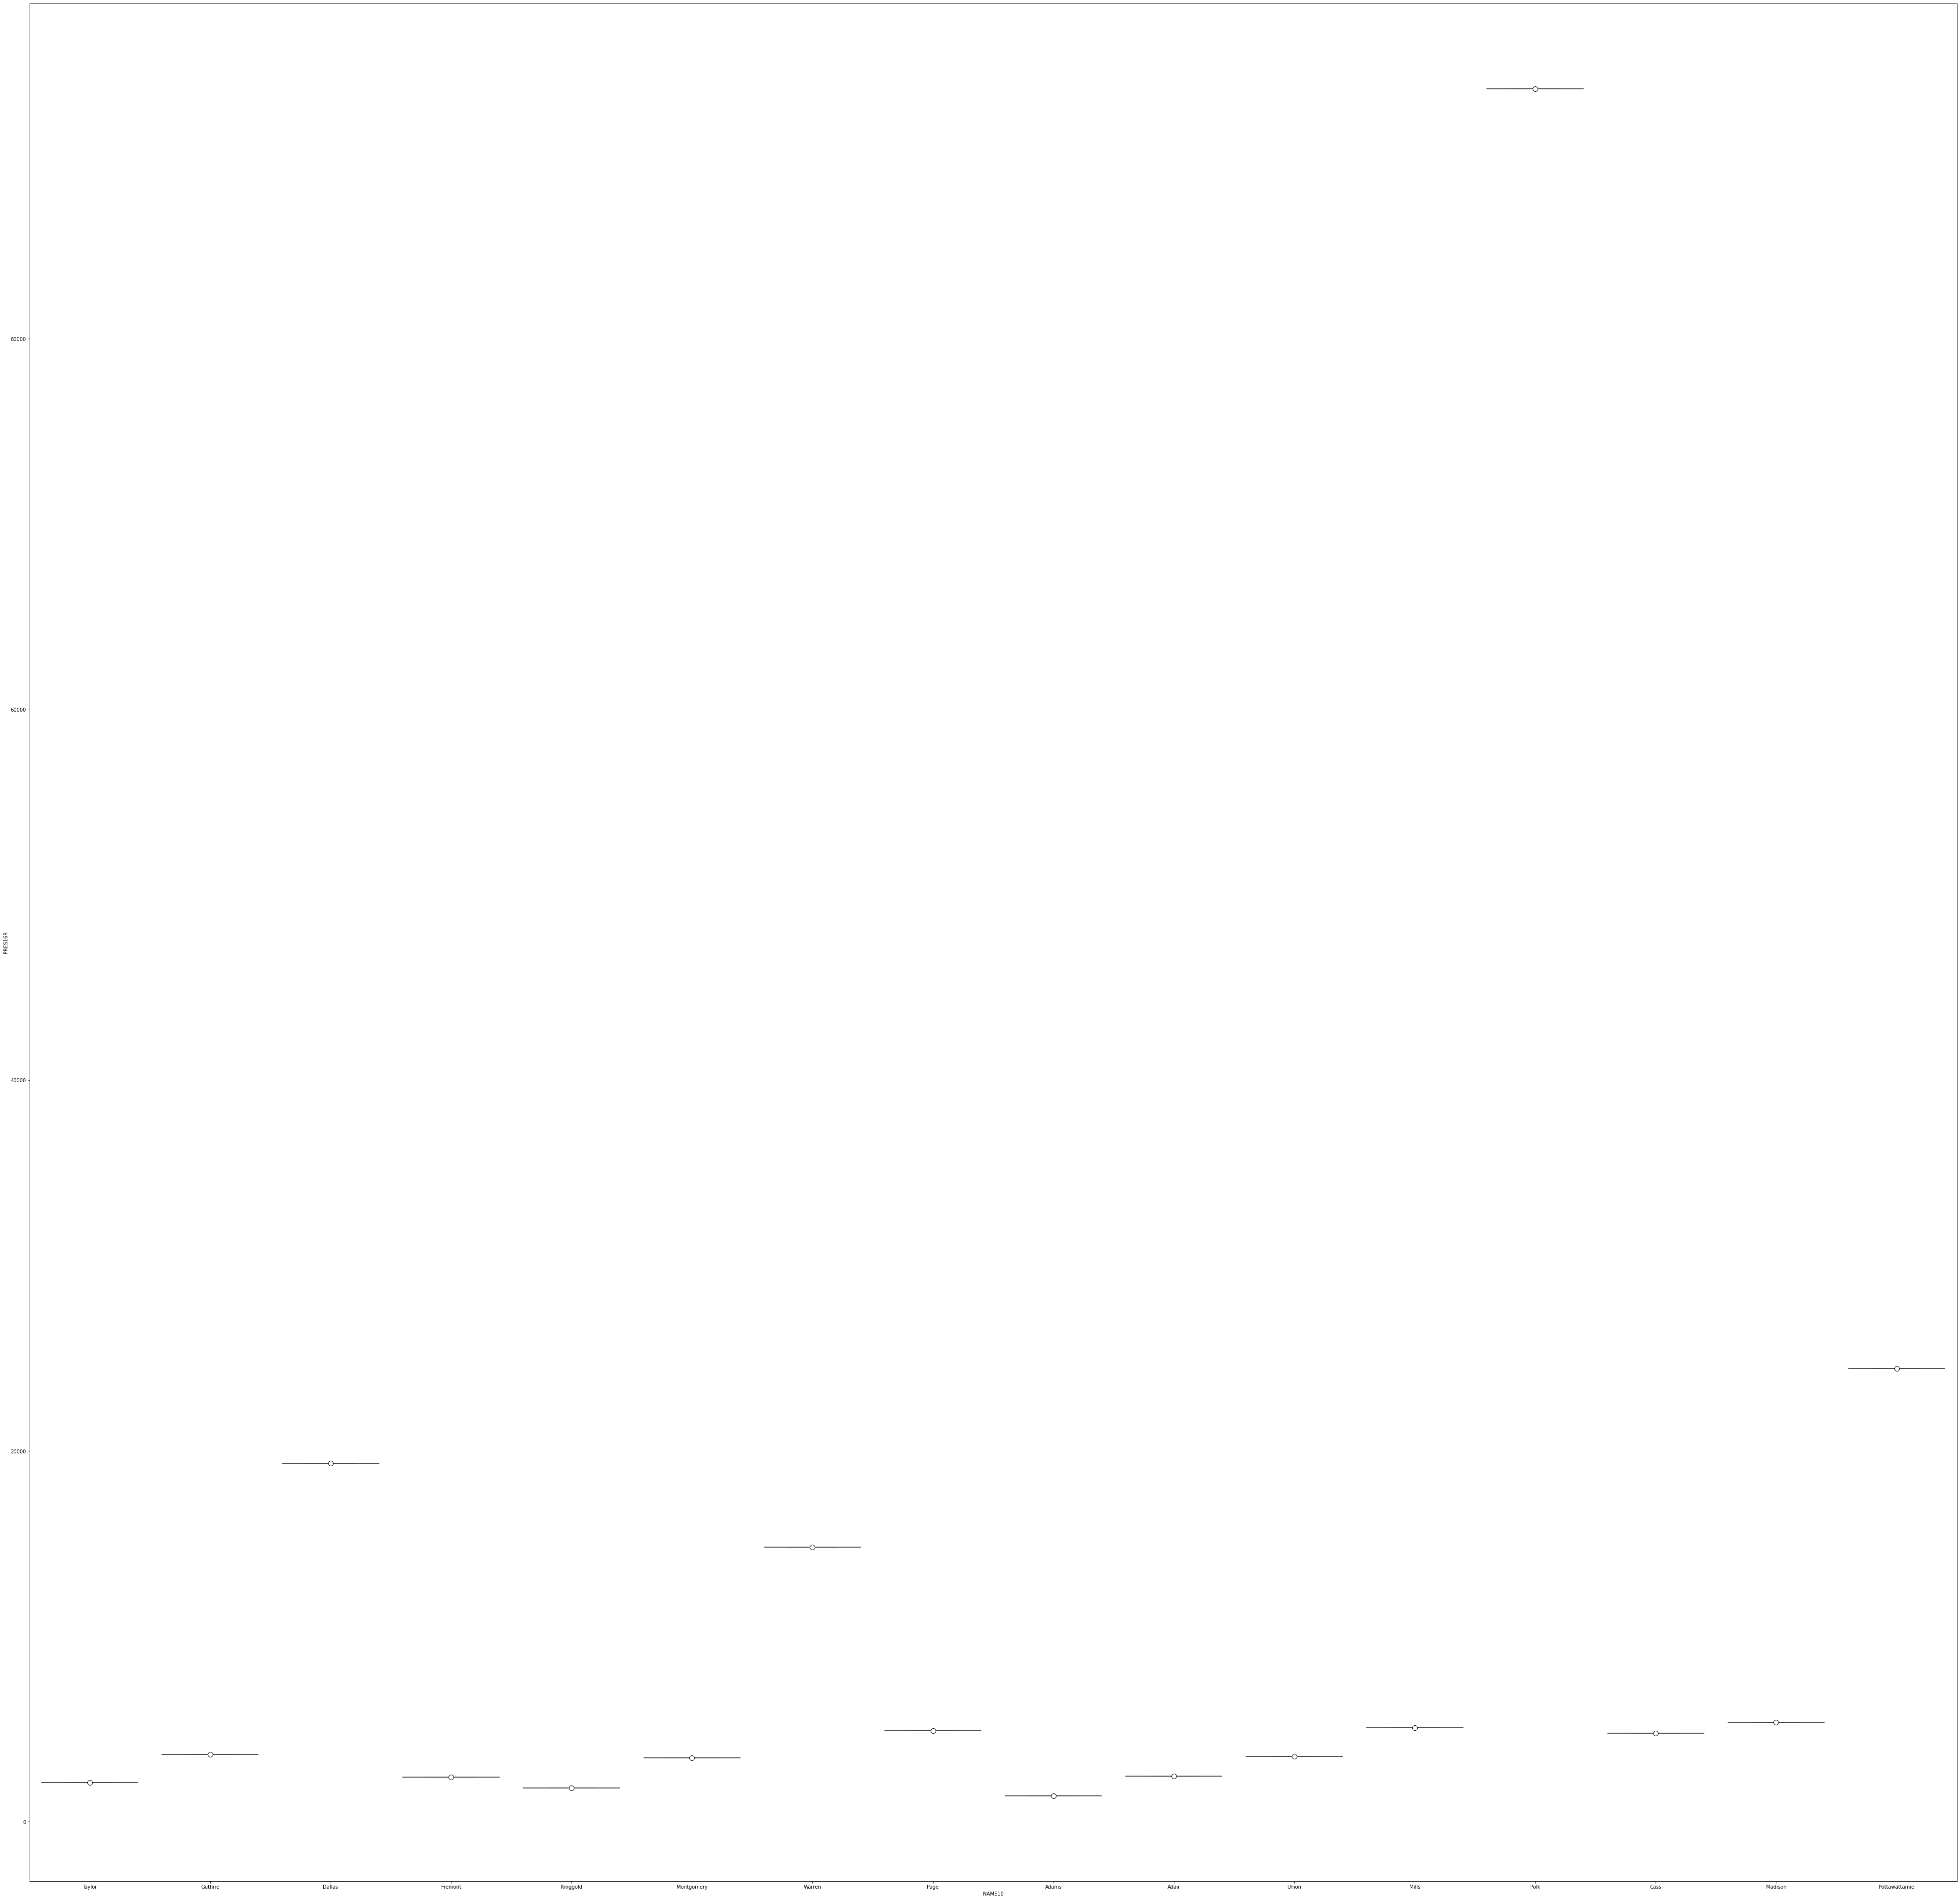

In [83]:
x = "NAME10"
y = "PRES16R"
plt.figure(figsize=(70,70,))
ax = sns.boxplot(x = x, y = y, data = CD_3, showmeans = True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

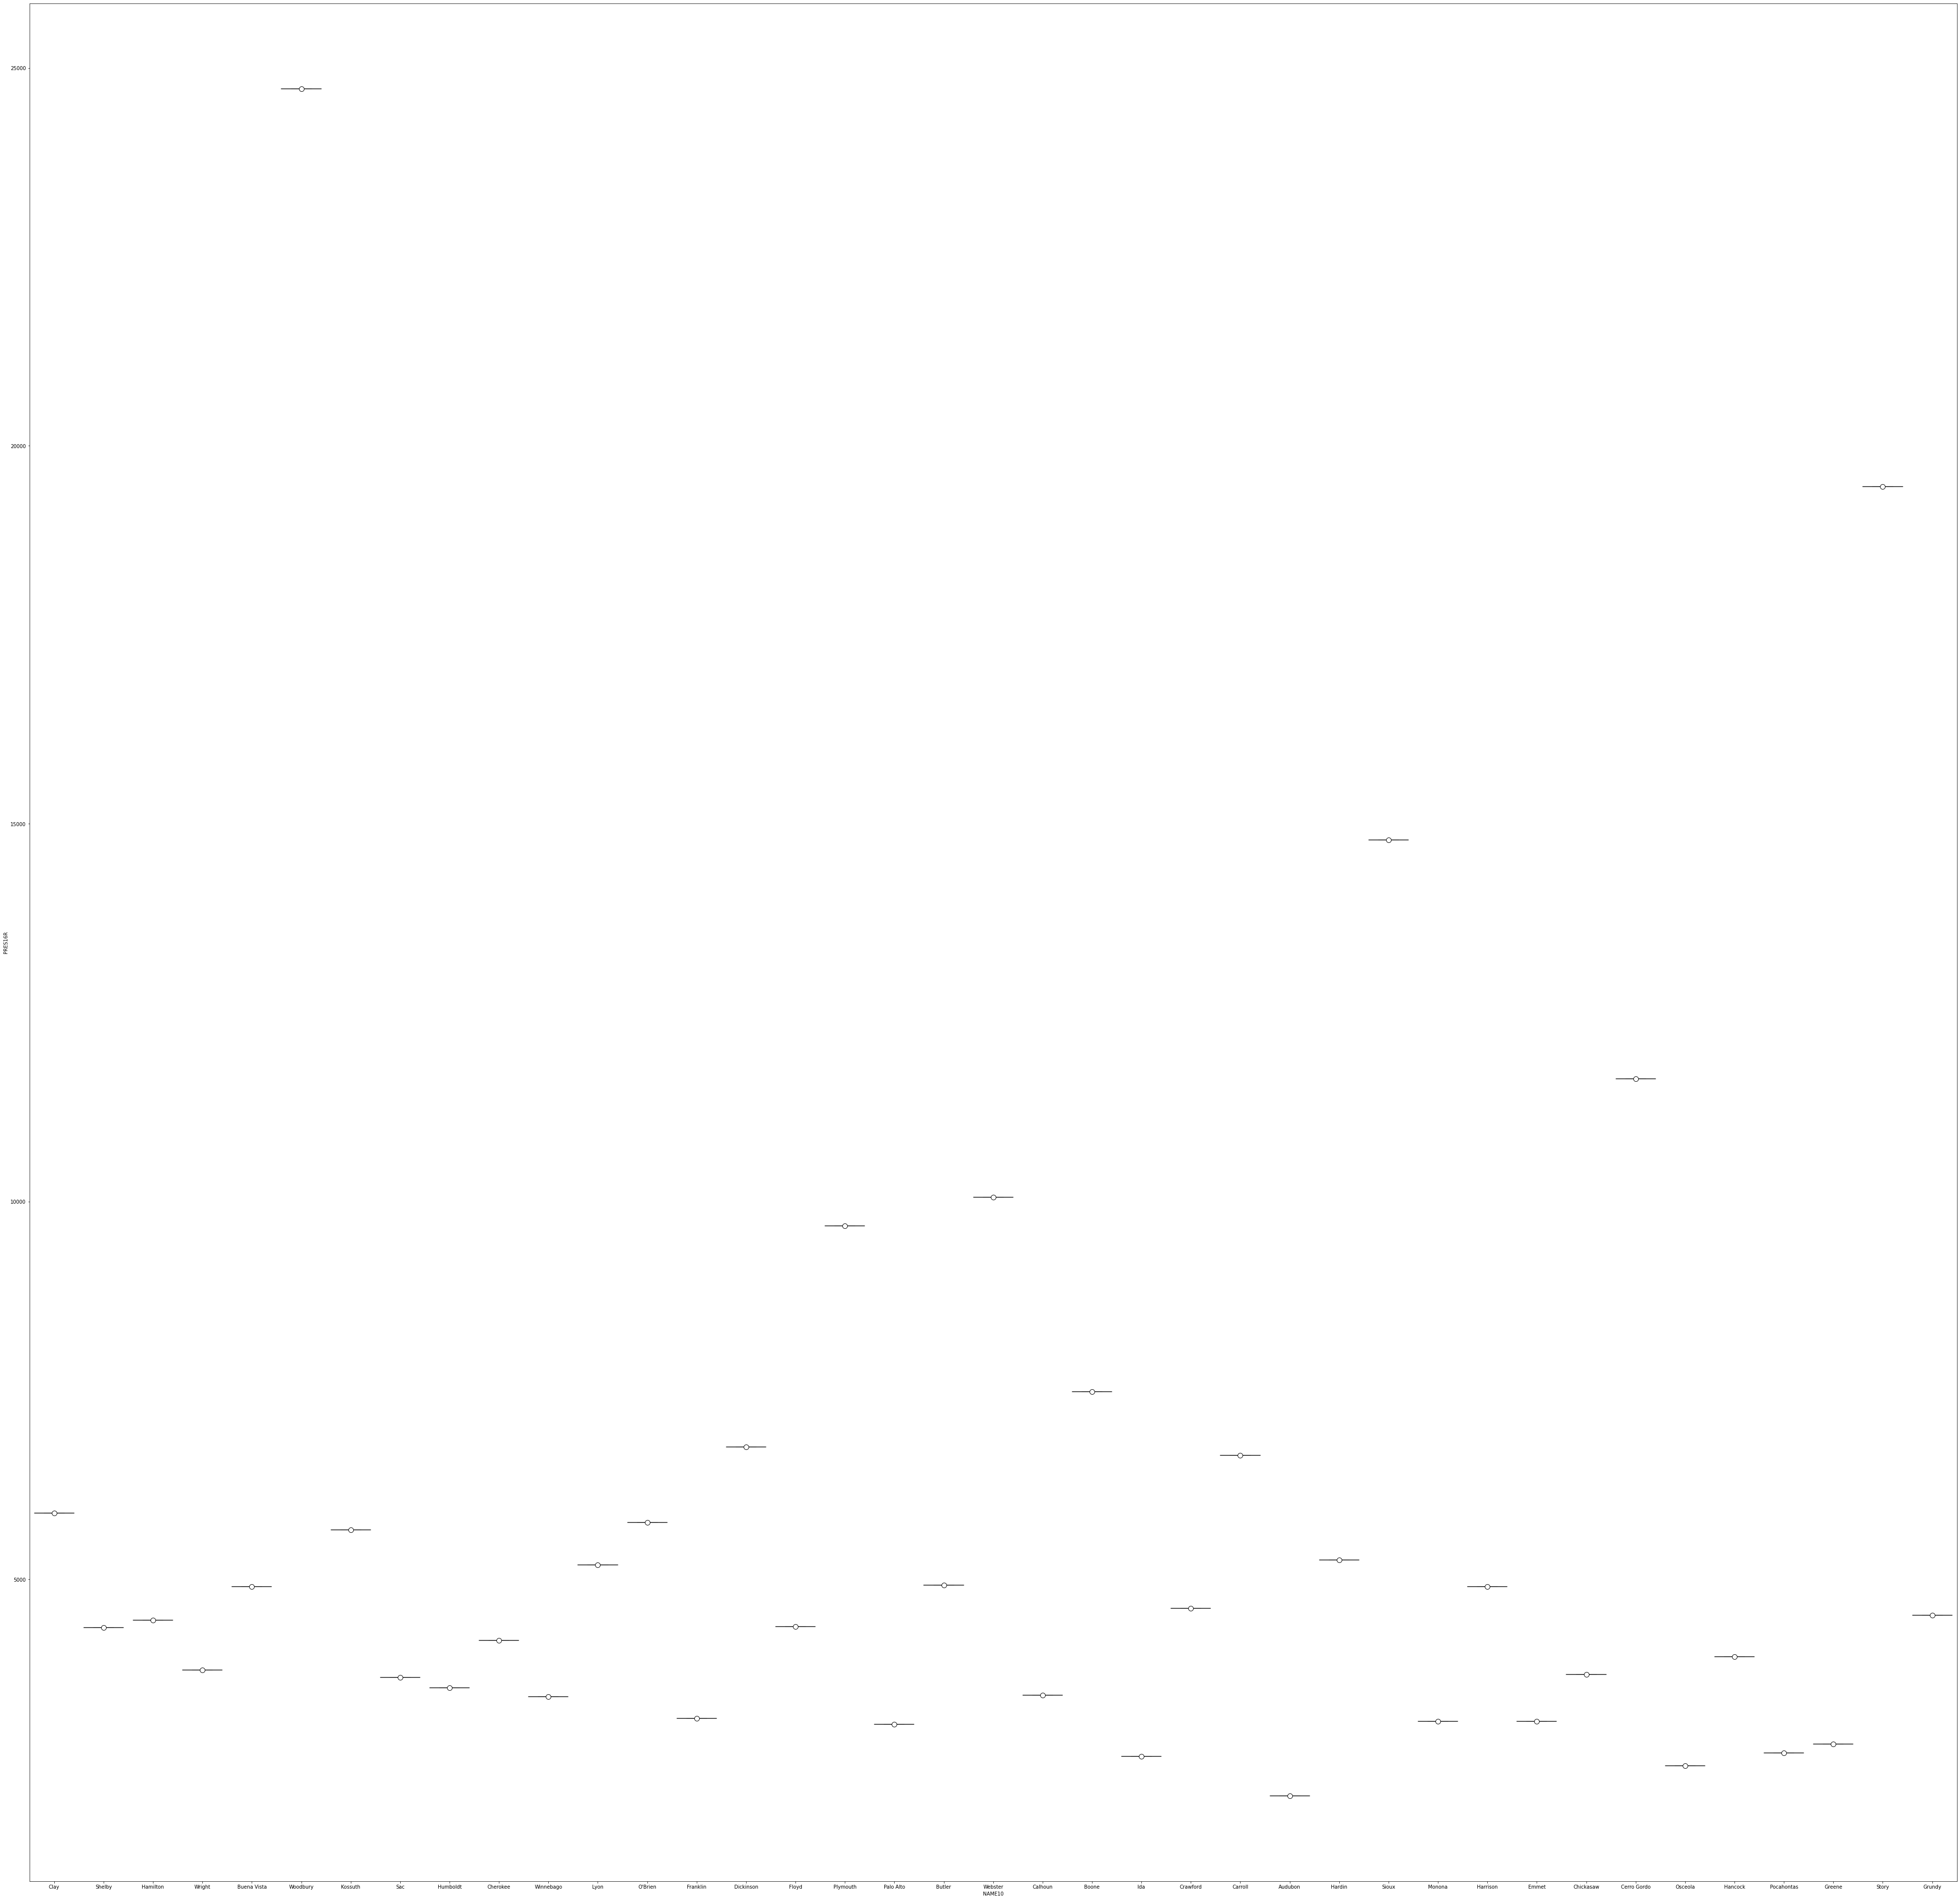

In [84]:
x = "NAME10"
y = "PRES16R"
plt.figure(figsize=(70,70,))
ax = sns.boxplot(x = x, y = y, data = CD_4, showmeans = True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

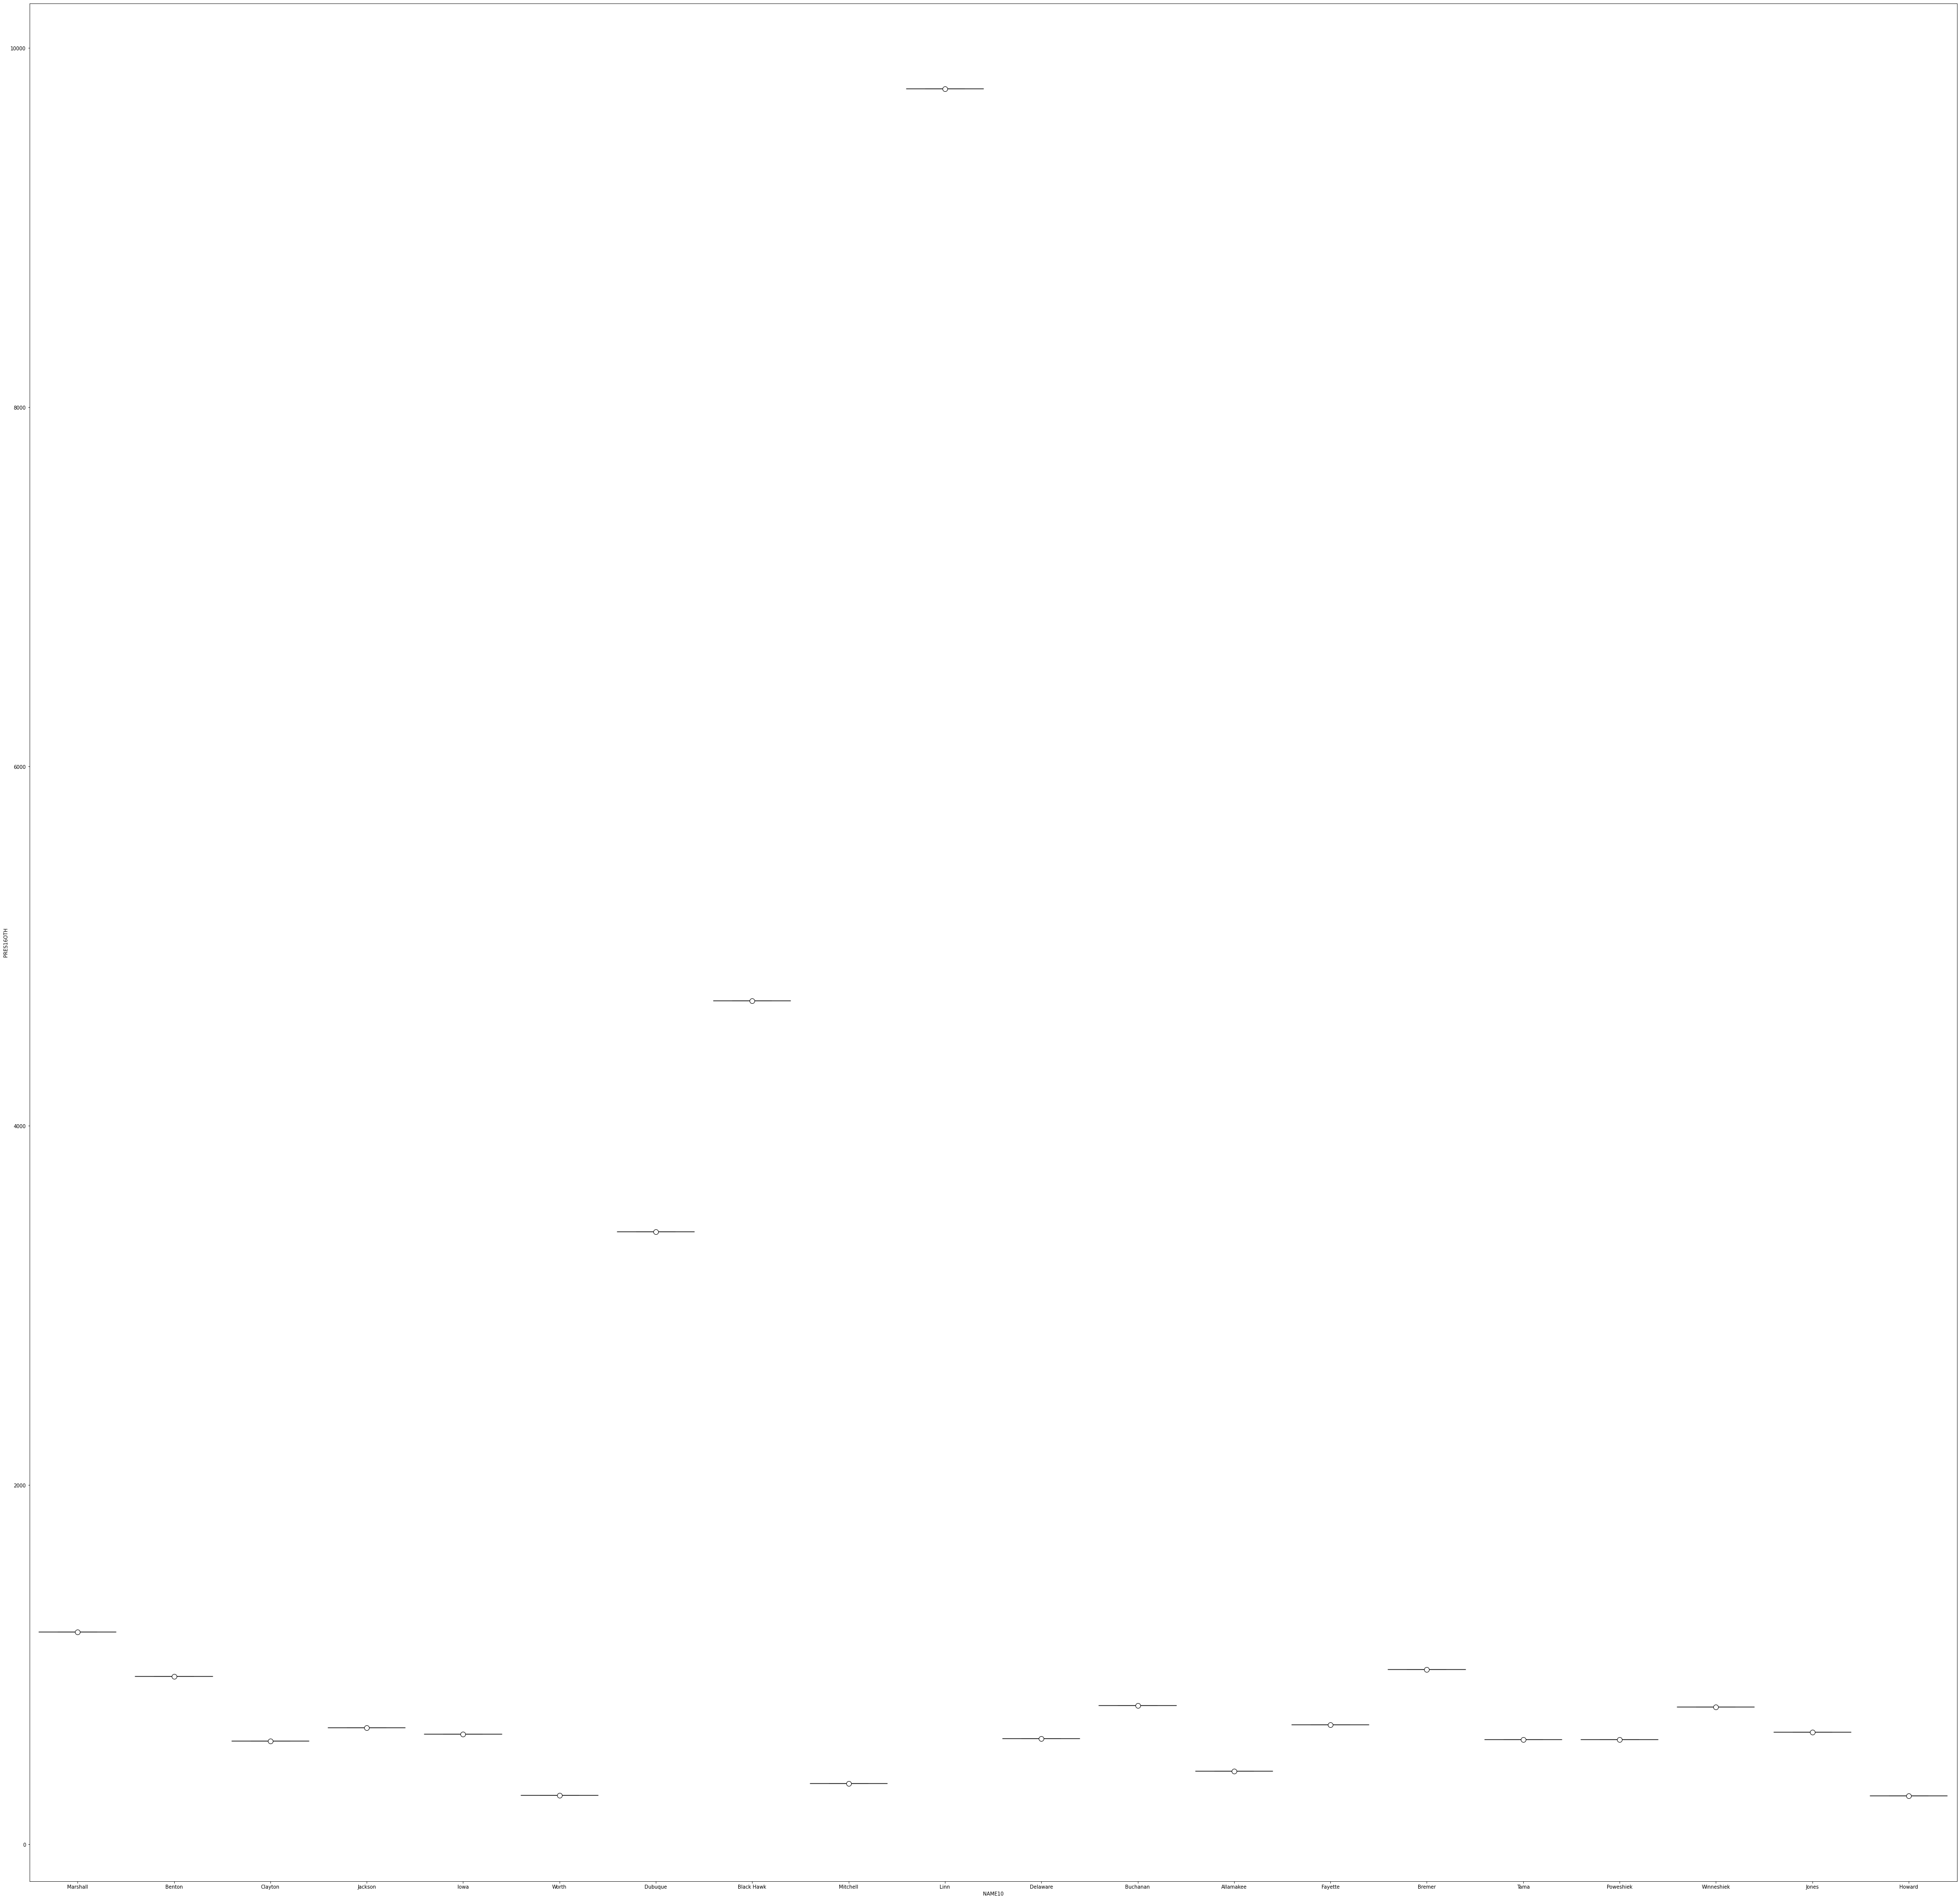

In [85]:
x = "NAME10"
y = "PRES16OTH"
plt.figure(figsize=(70,70,))
ax = sns.boxplot(x = x, y = y, data = CD_1, showmeans = True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

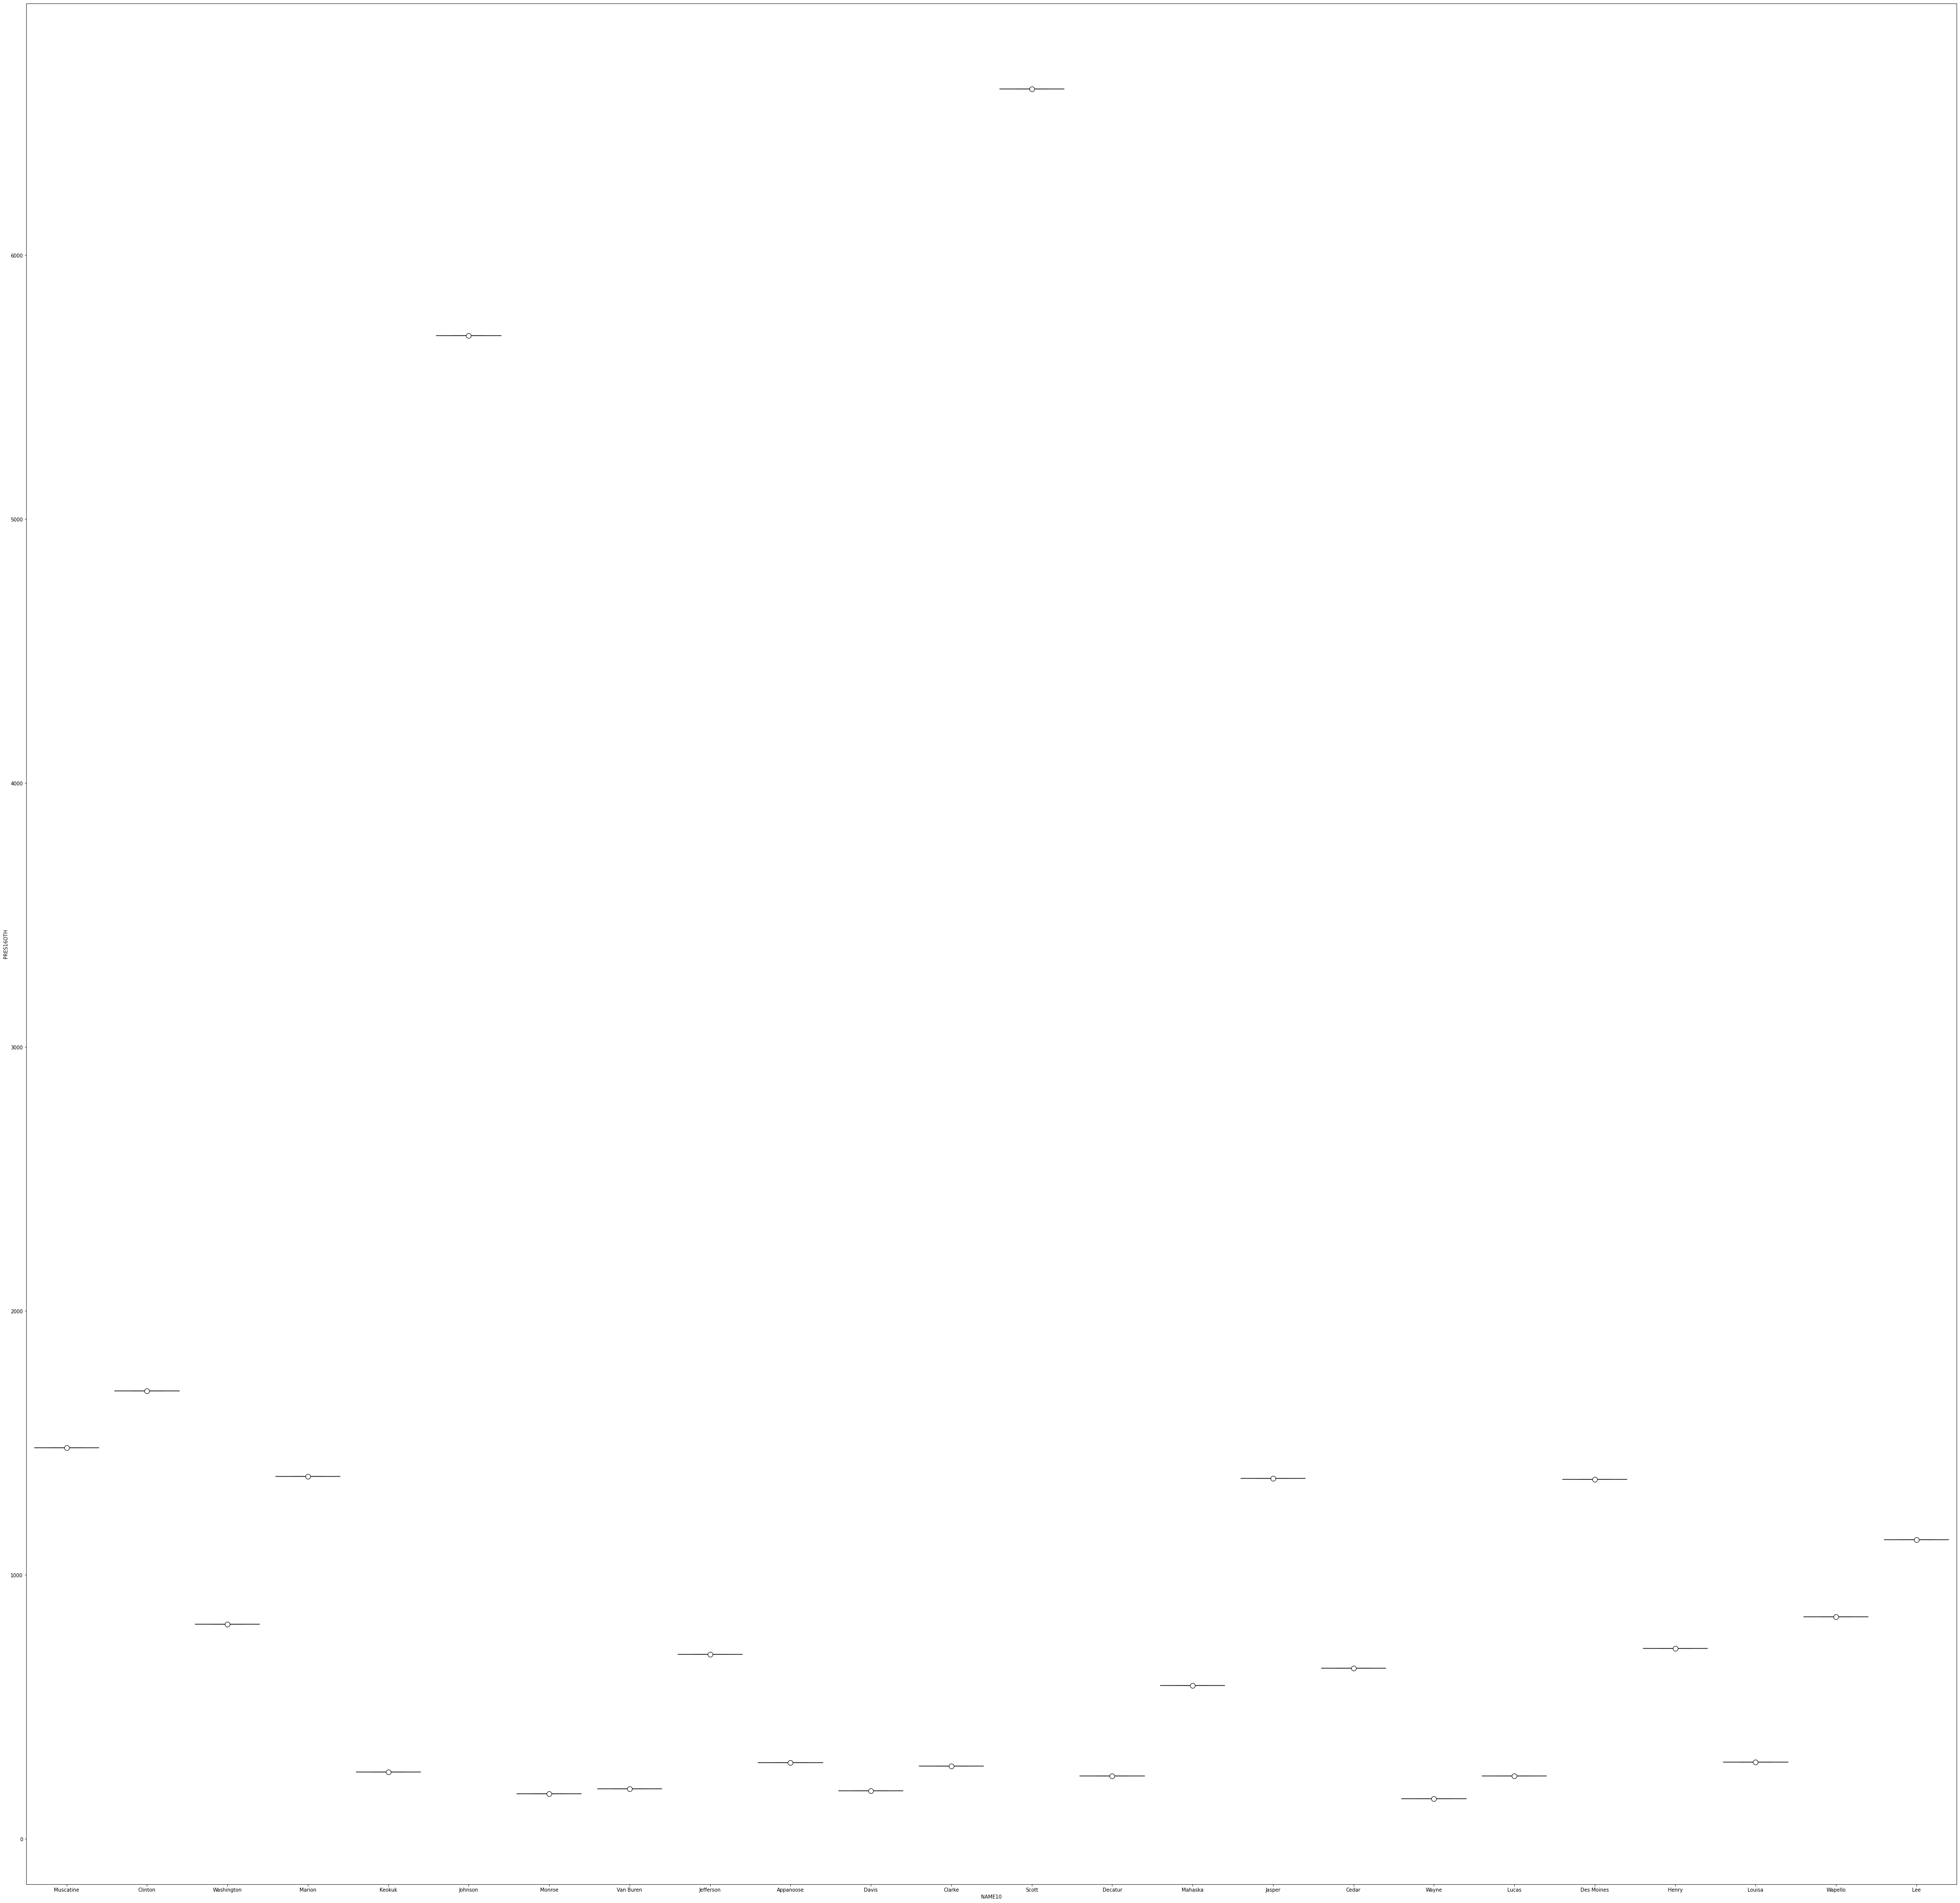

In [86]:
x = "NAME10"
y = "PRES16OTH"
plt.figure(figsize=(70,70,))
ax = sns.boxplot(x = x, y = y, data = CD_2, showmeans = True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

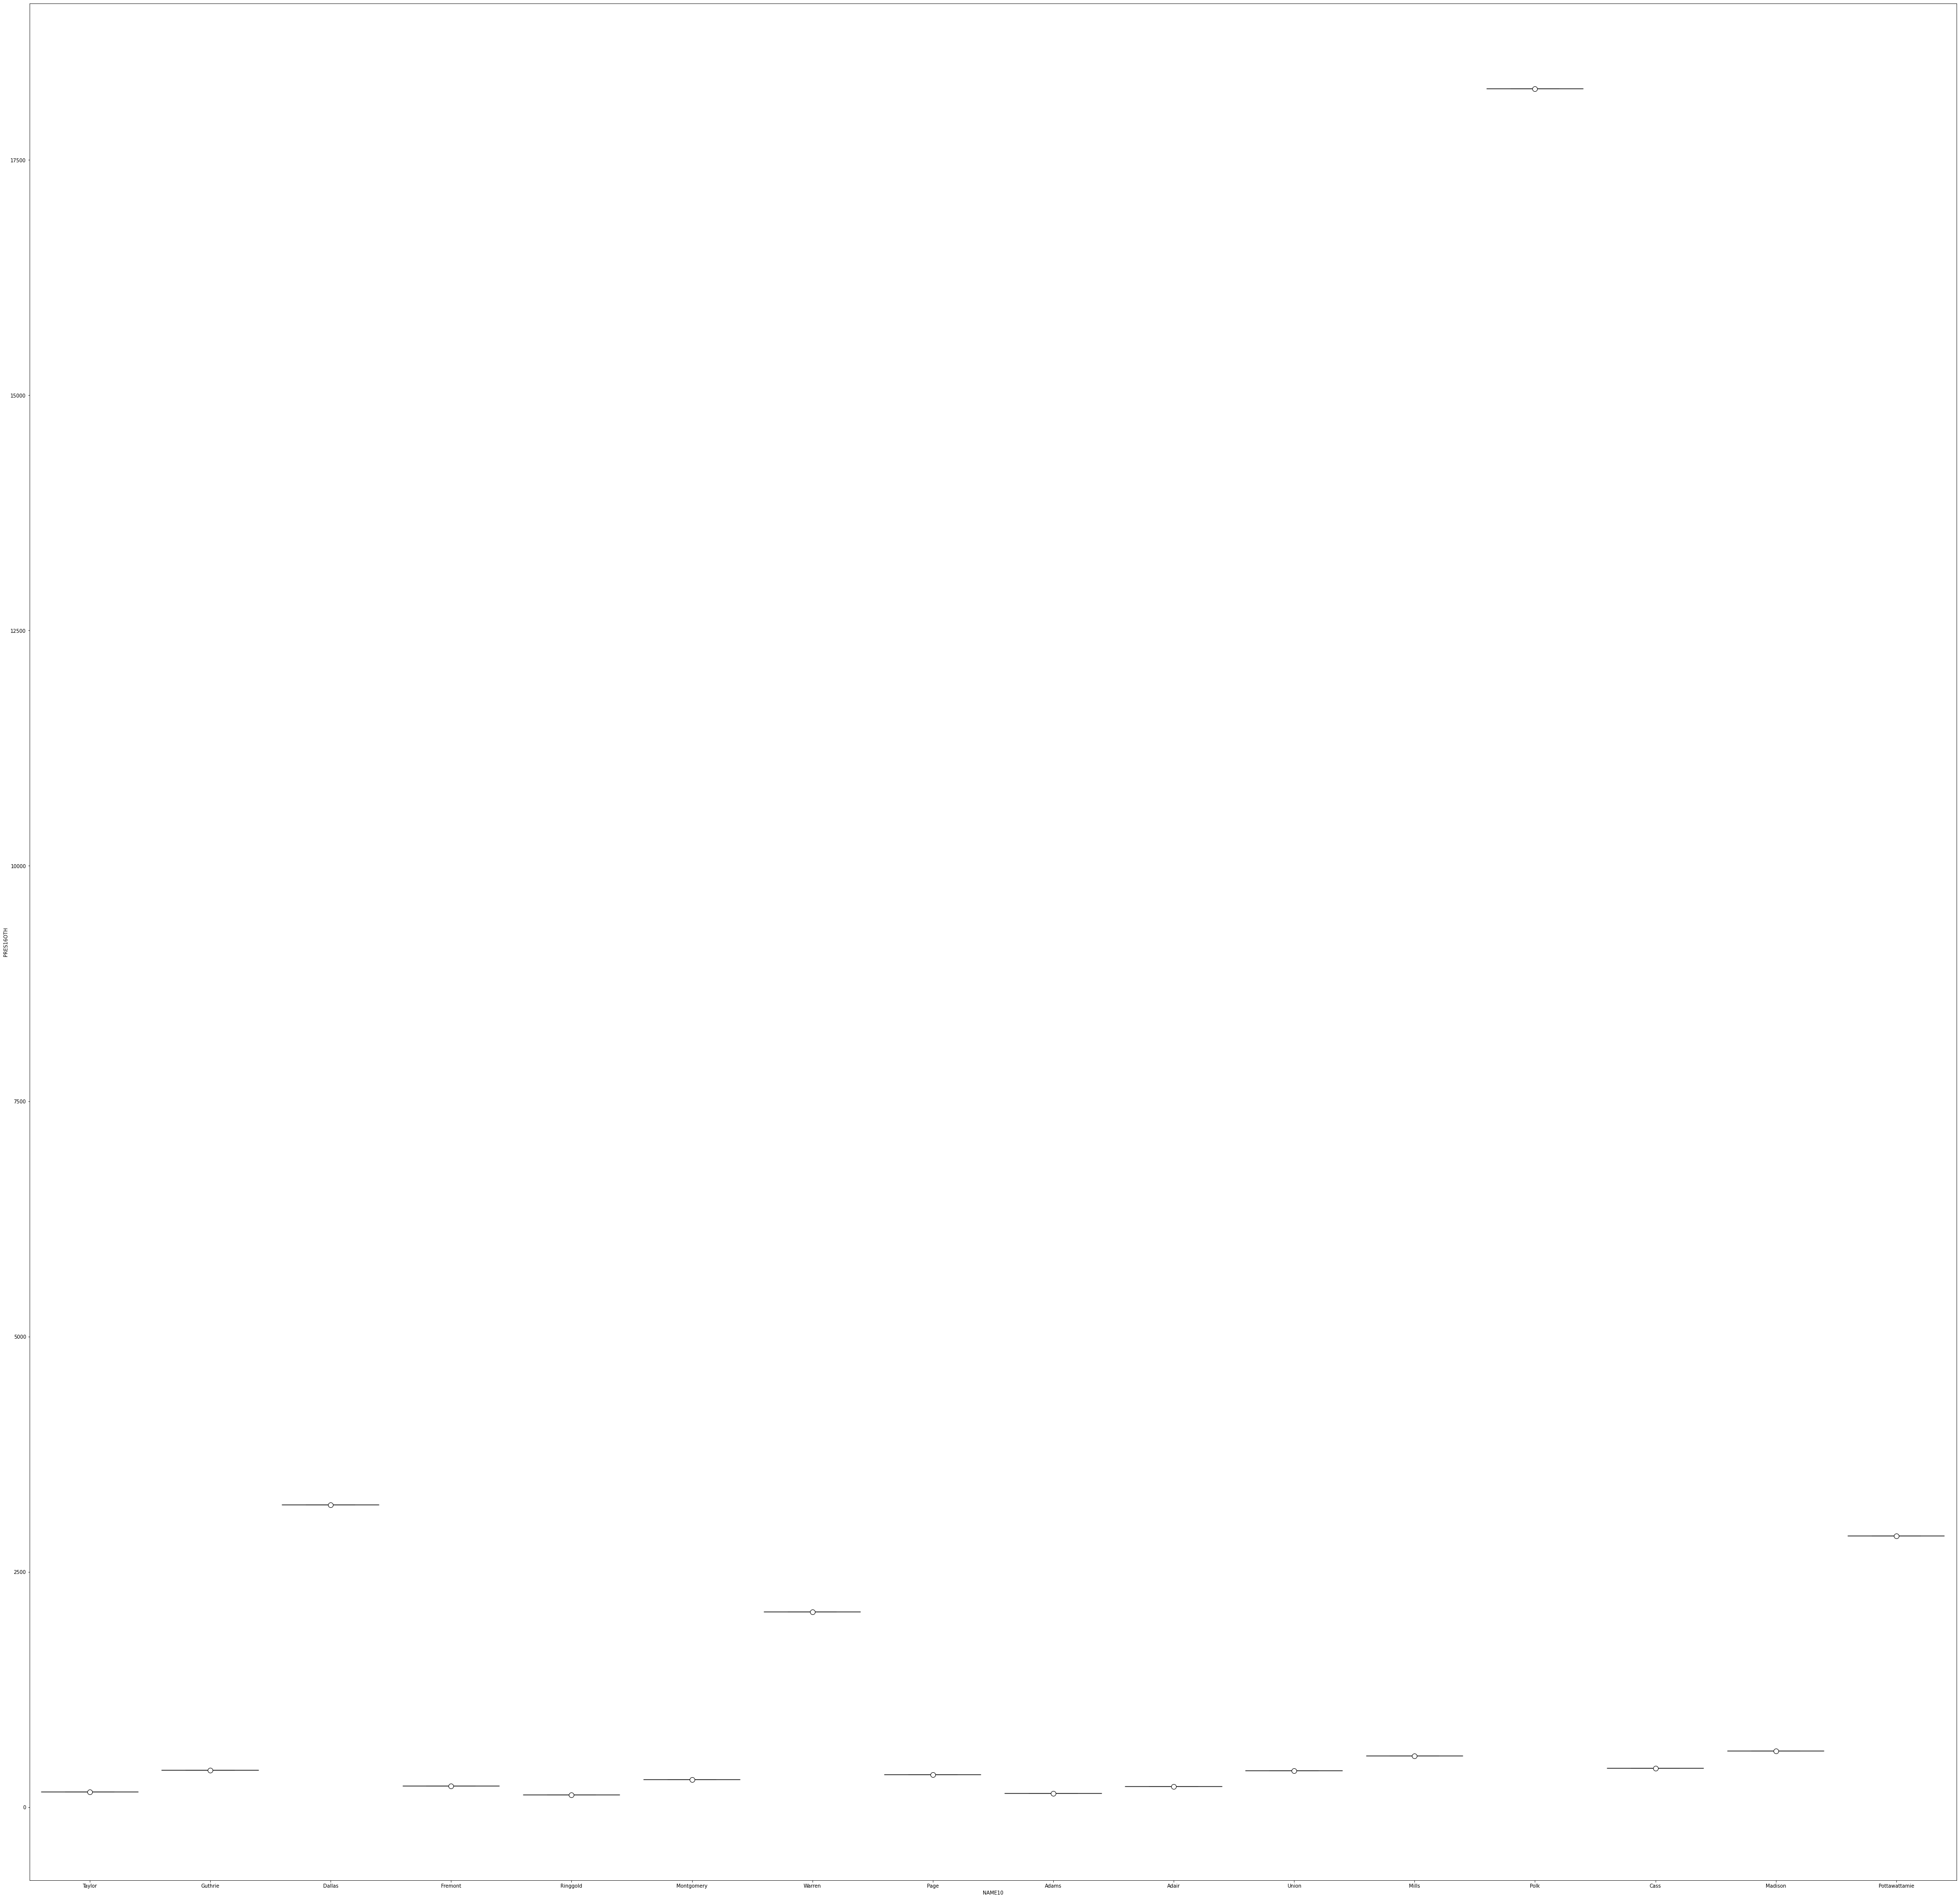

In [87]:
x = "NAME10"
y = "PRES16OTH"
plt.figure(figsize=(70,70,))
ax = sns.boxplot(x = x, y = y, data = CD_3, showmeans = True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

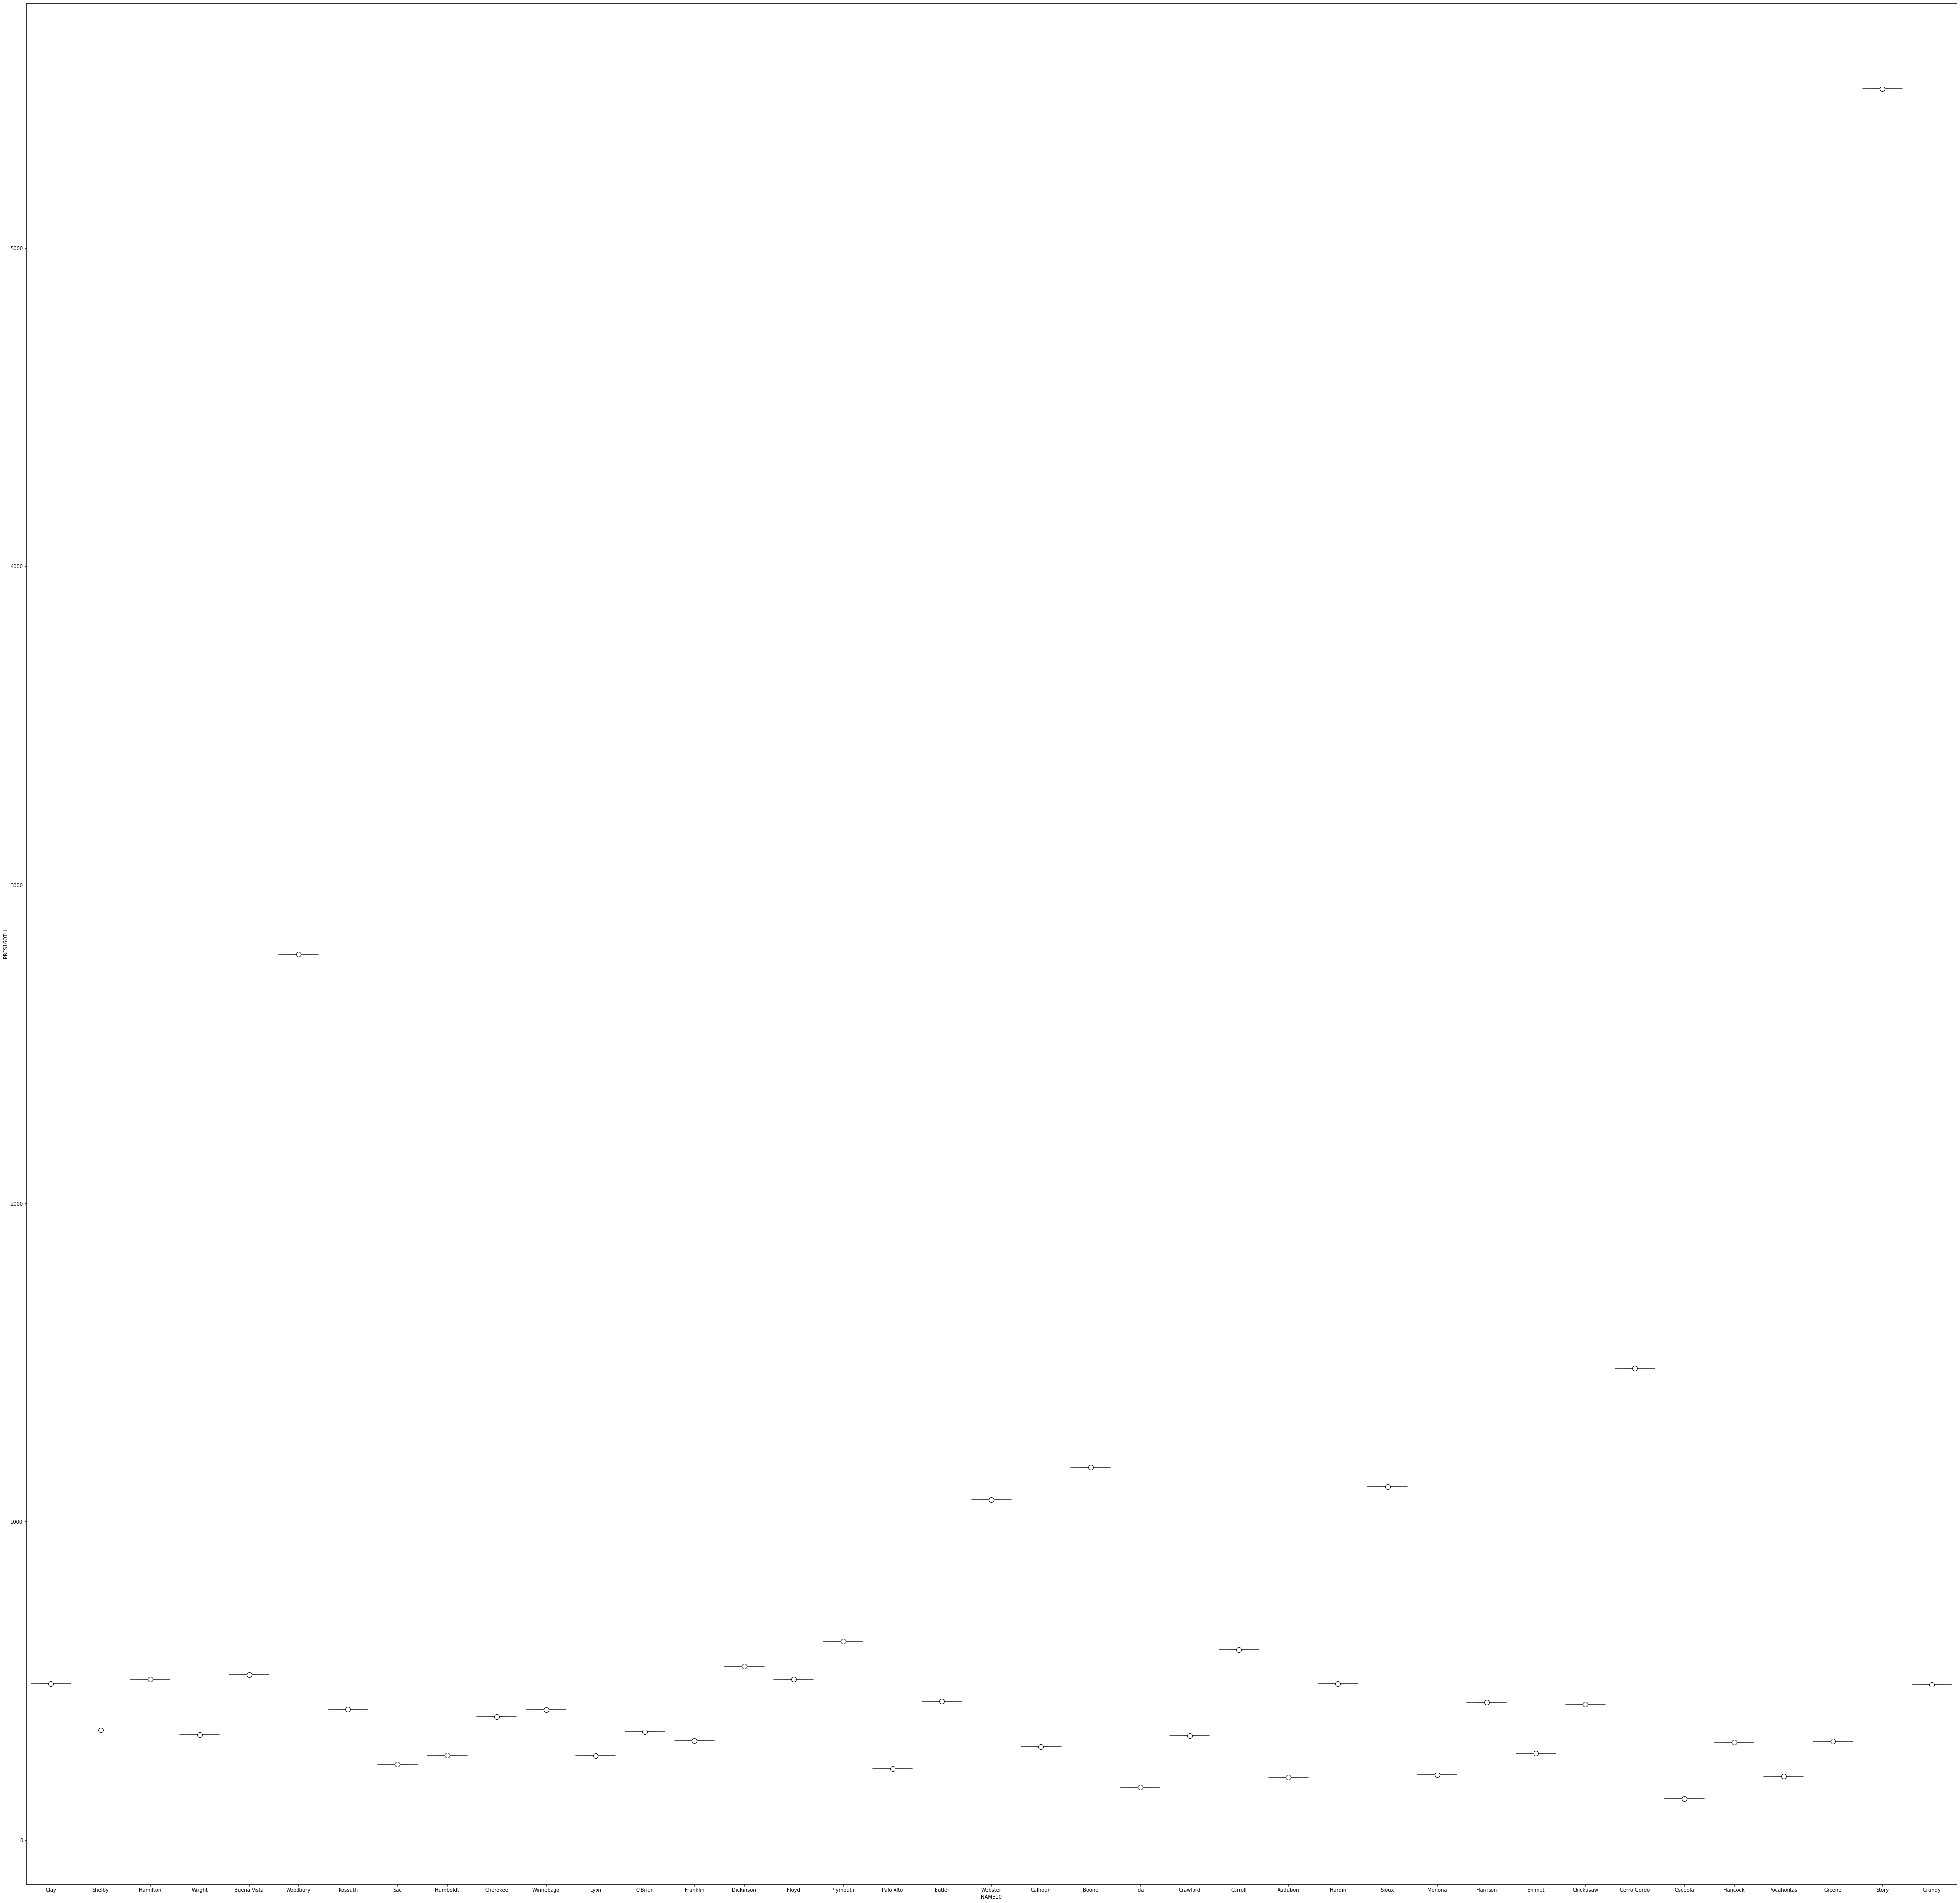

In [88]:
x = "NAME10"
y = "PRES16OTH"
plt.figure(figsize=(70,70,))
ax = sns.boxplot(x = x, y = y, data = CD_4, showmeans = True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

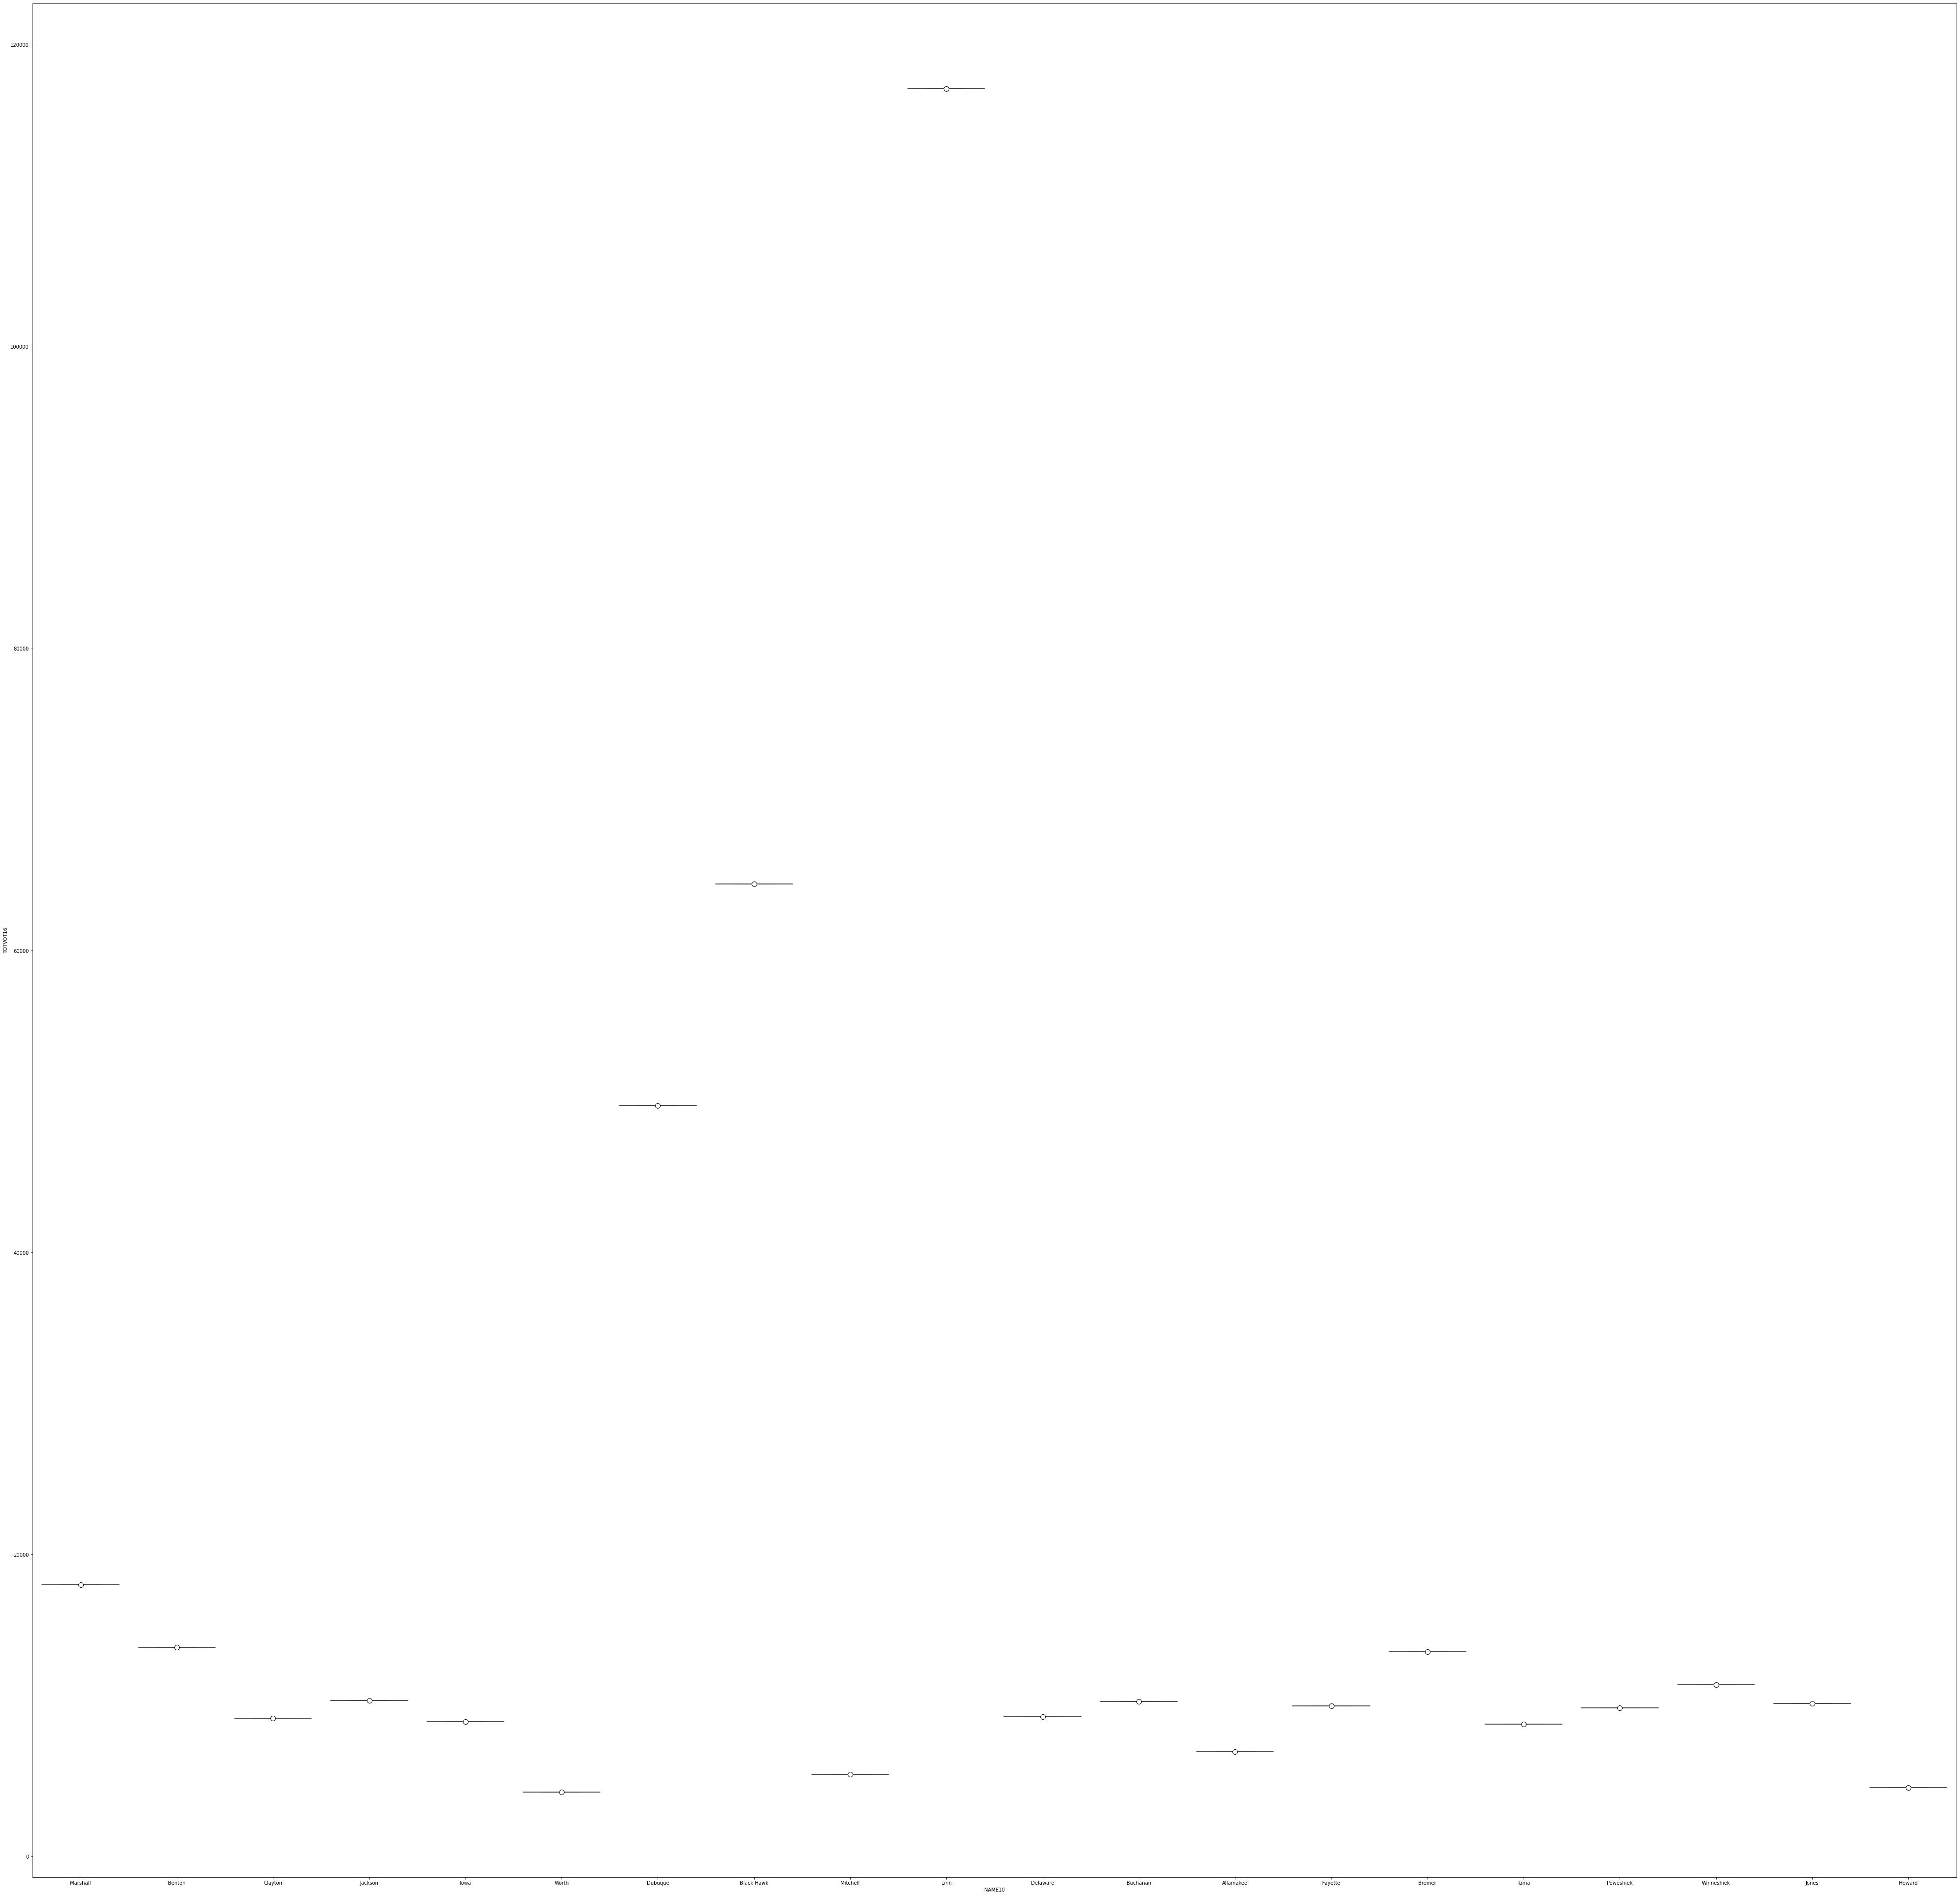

In [89]:
x = "NAME10"
y = "TOTVOT16"
plt.figure(figsize=(70,70,))
ax = sns.boxplot(x = x, y = y, data = CD_1, showmeans = True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

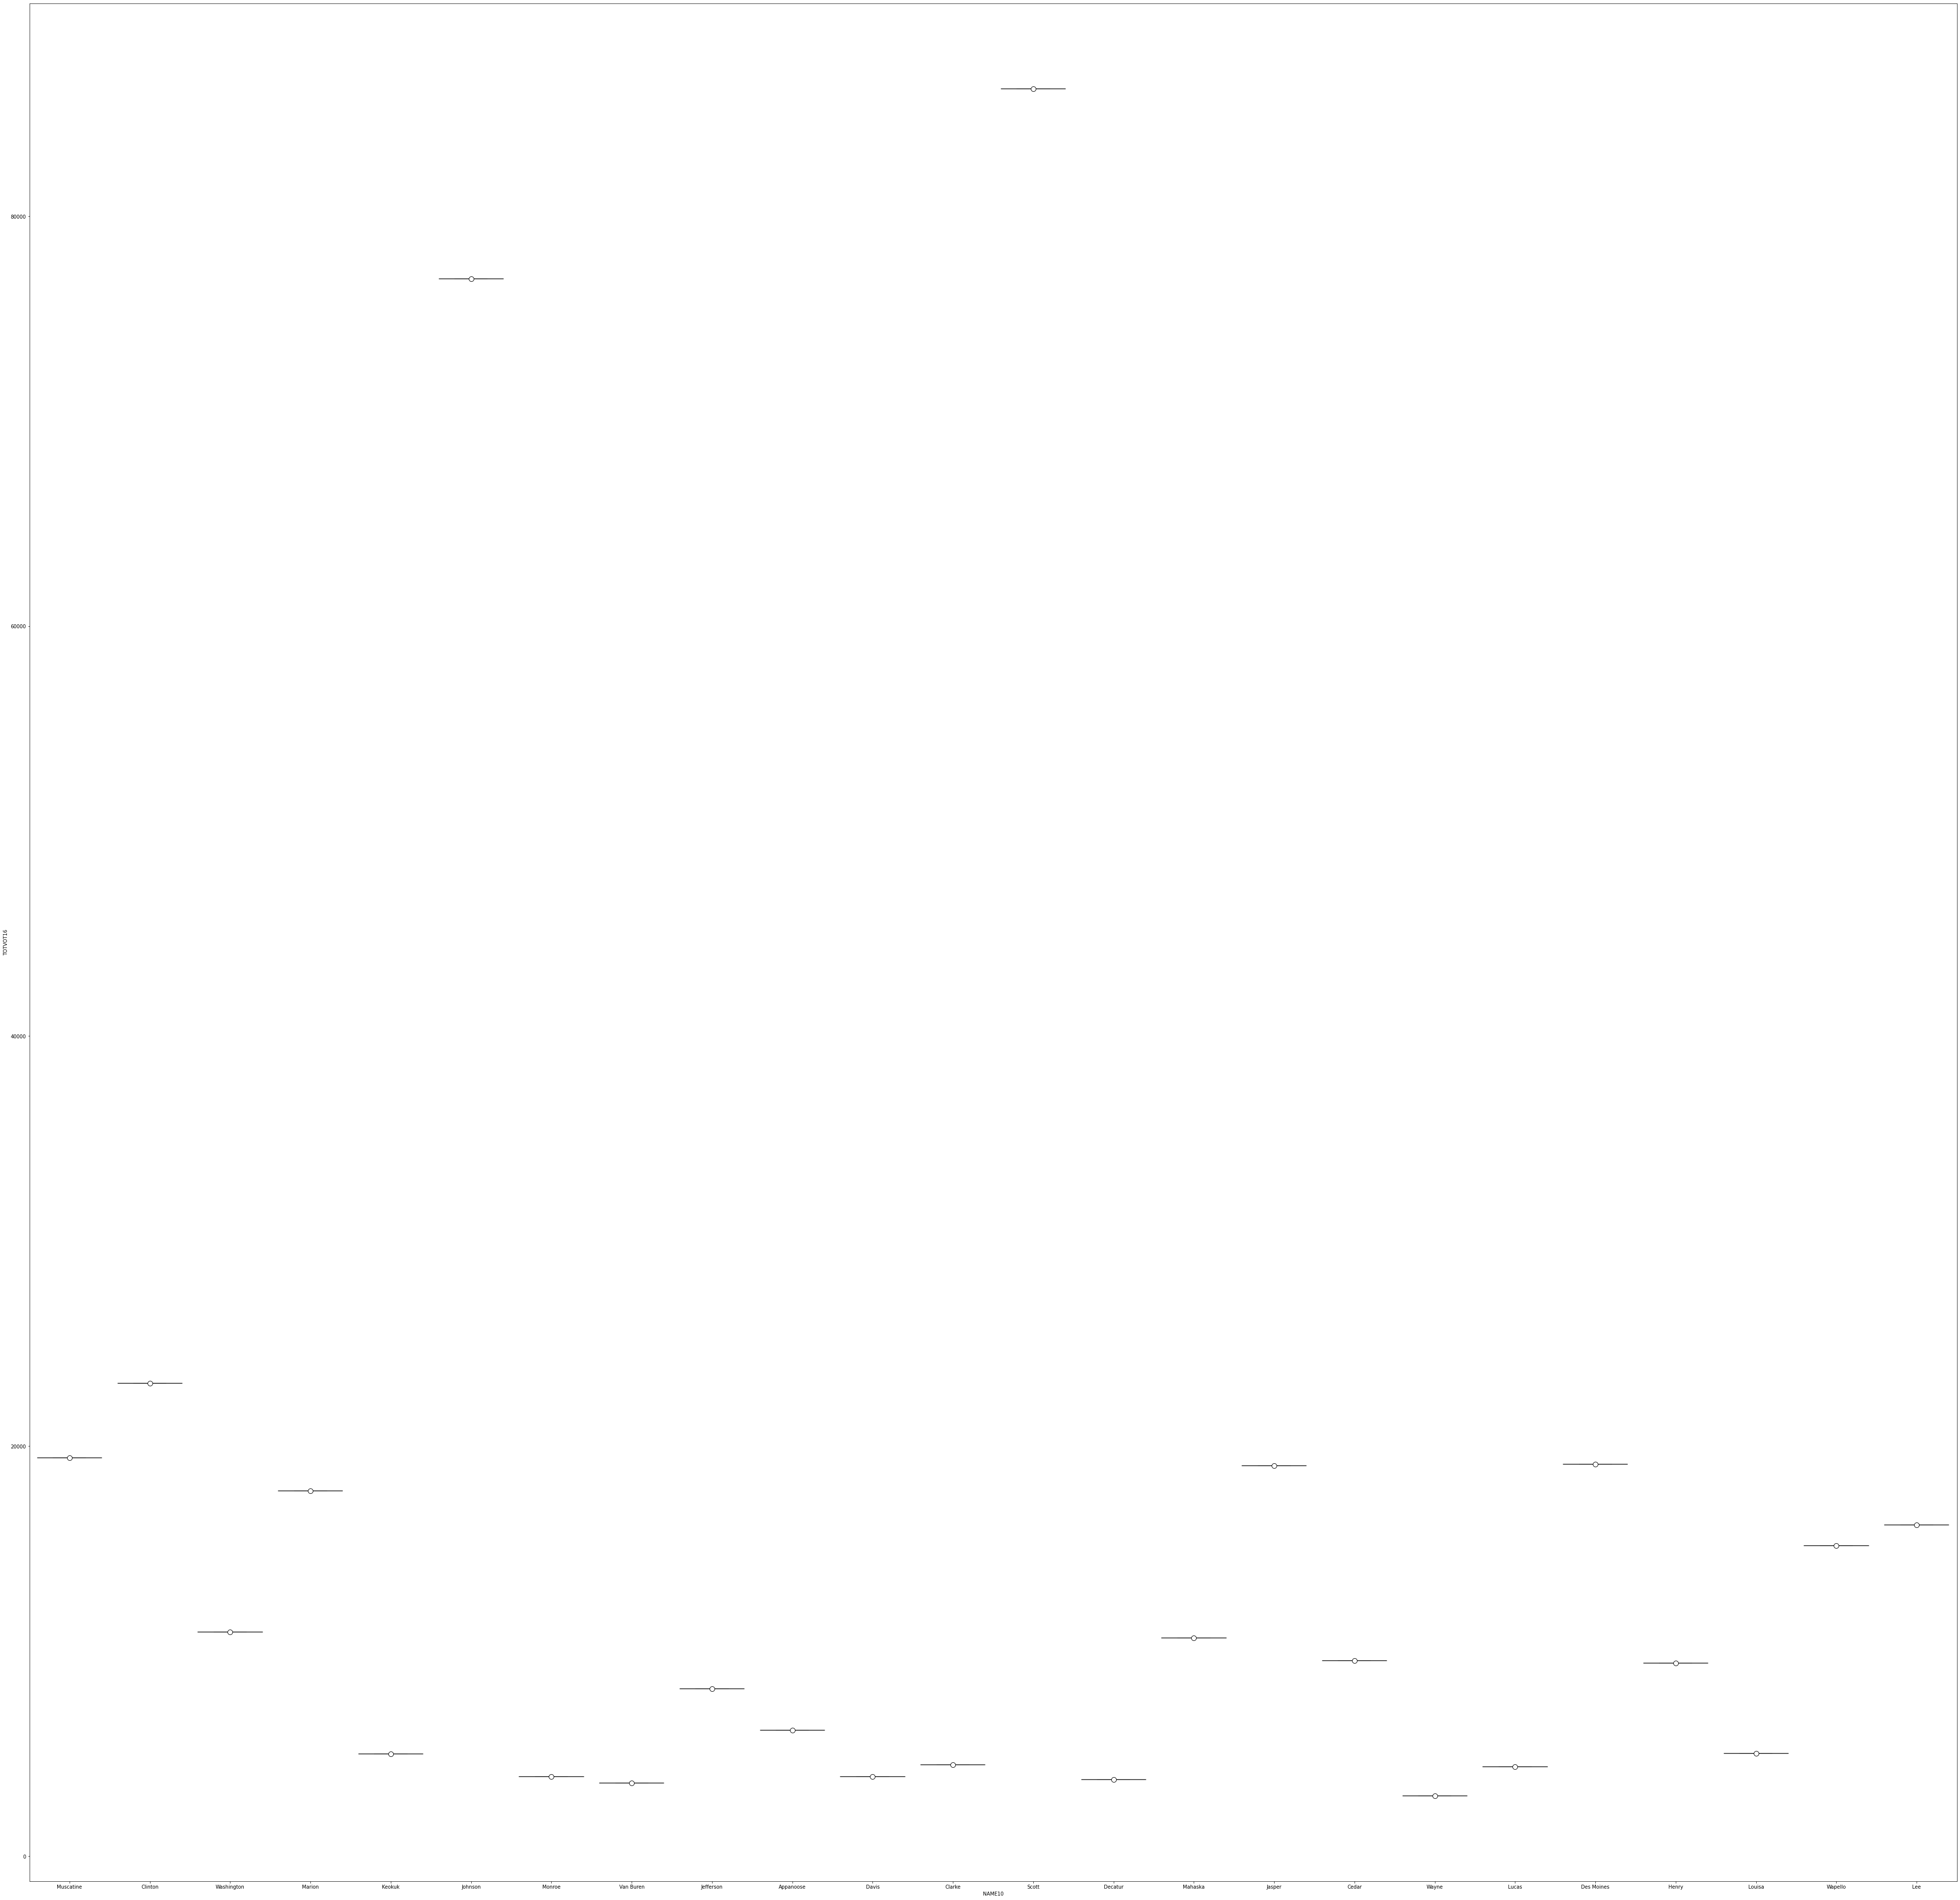

In [90]:
x = "NAME10"
y = "TOTVOT16"
plt.figure(figsize=(70,70,))
ax = sns.boxplot(x = x, y = y, data = CD_2, showmeans = True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

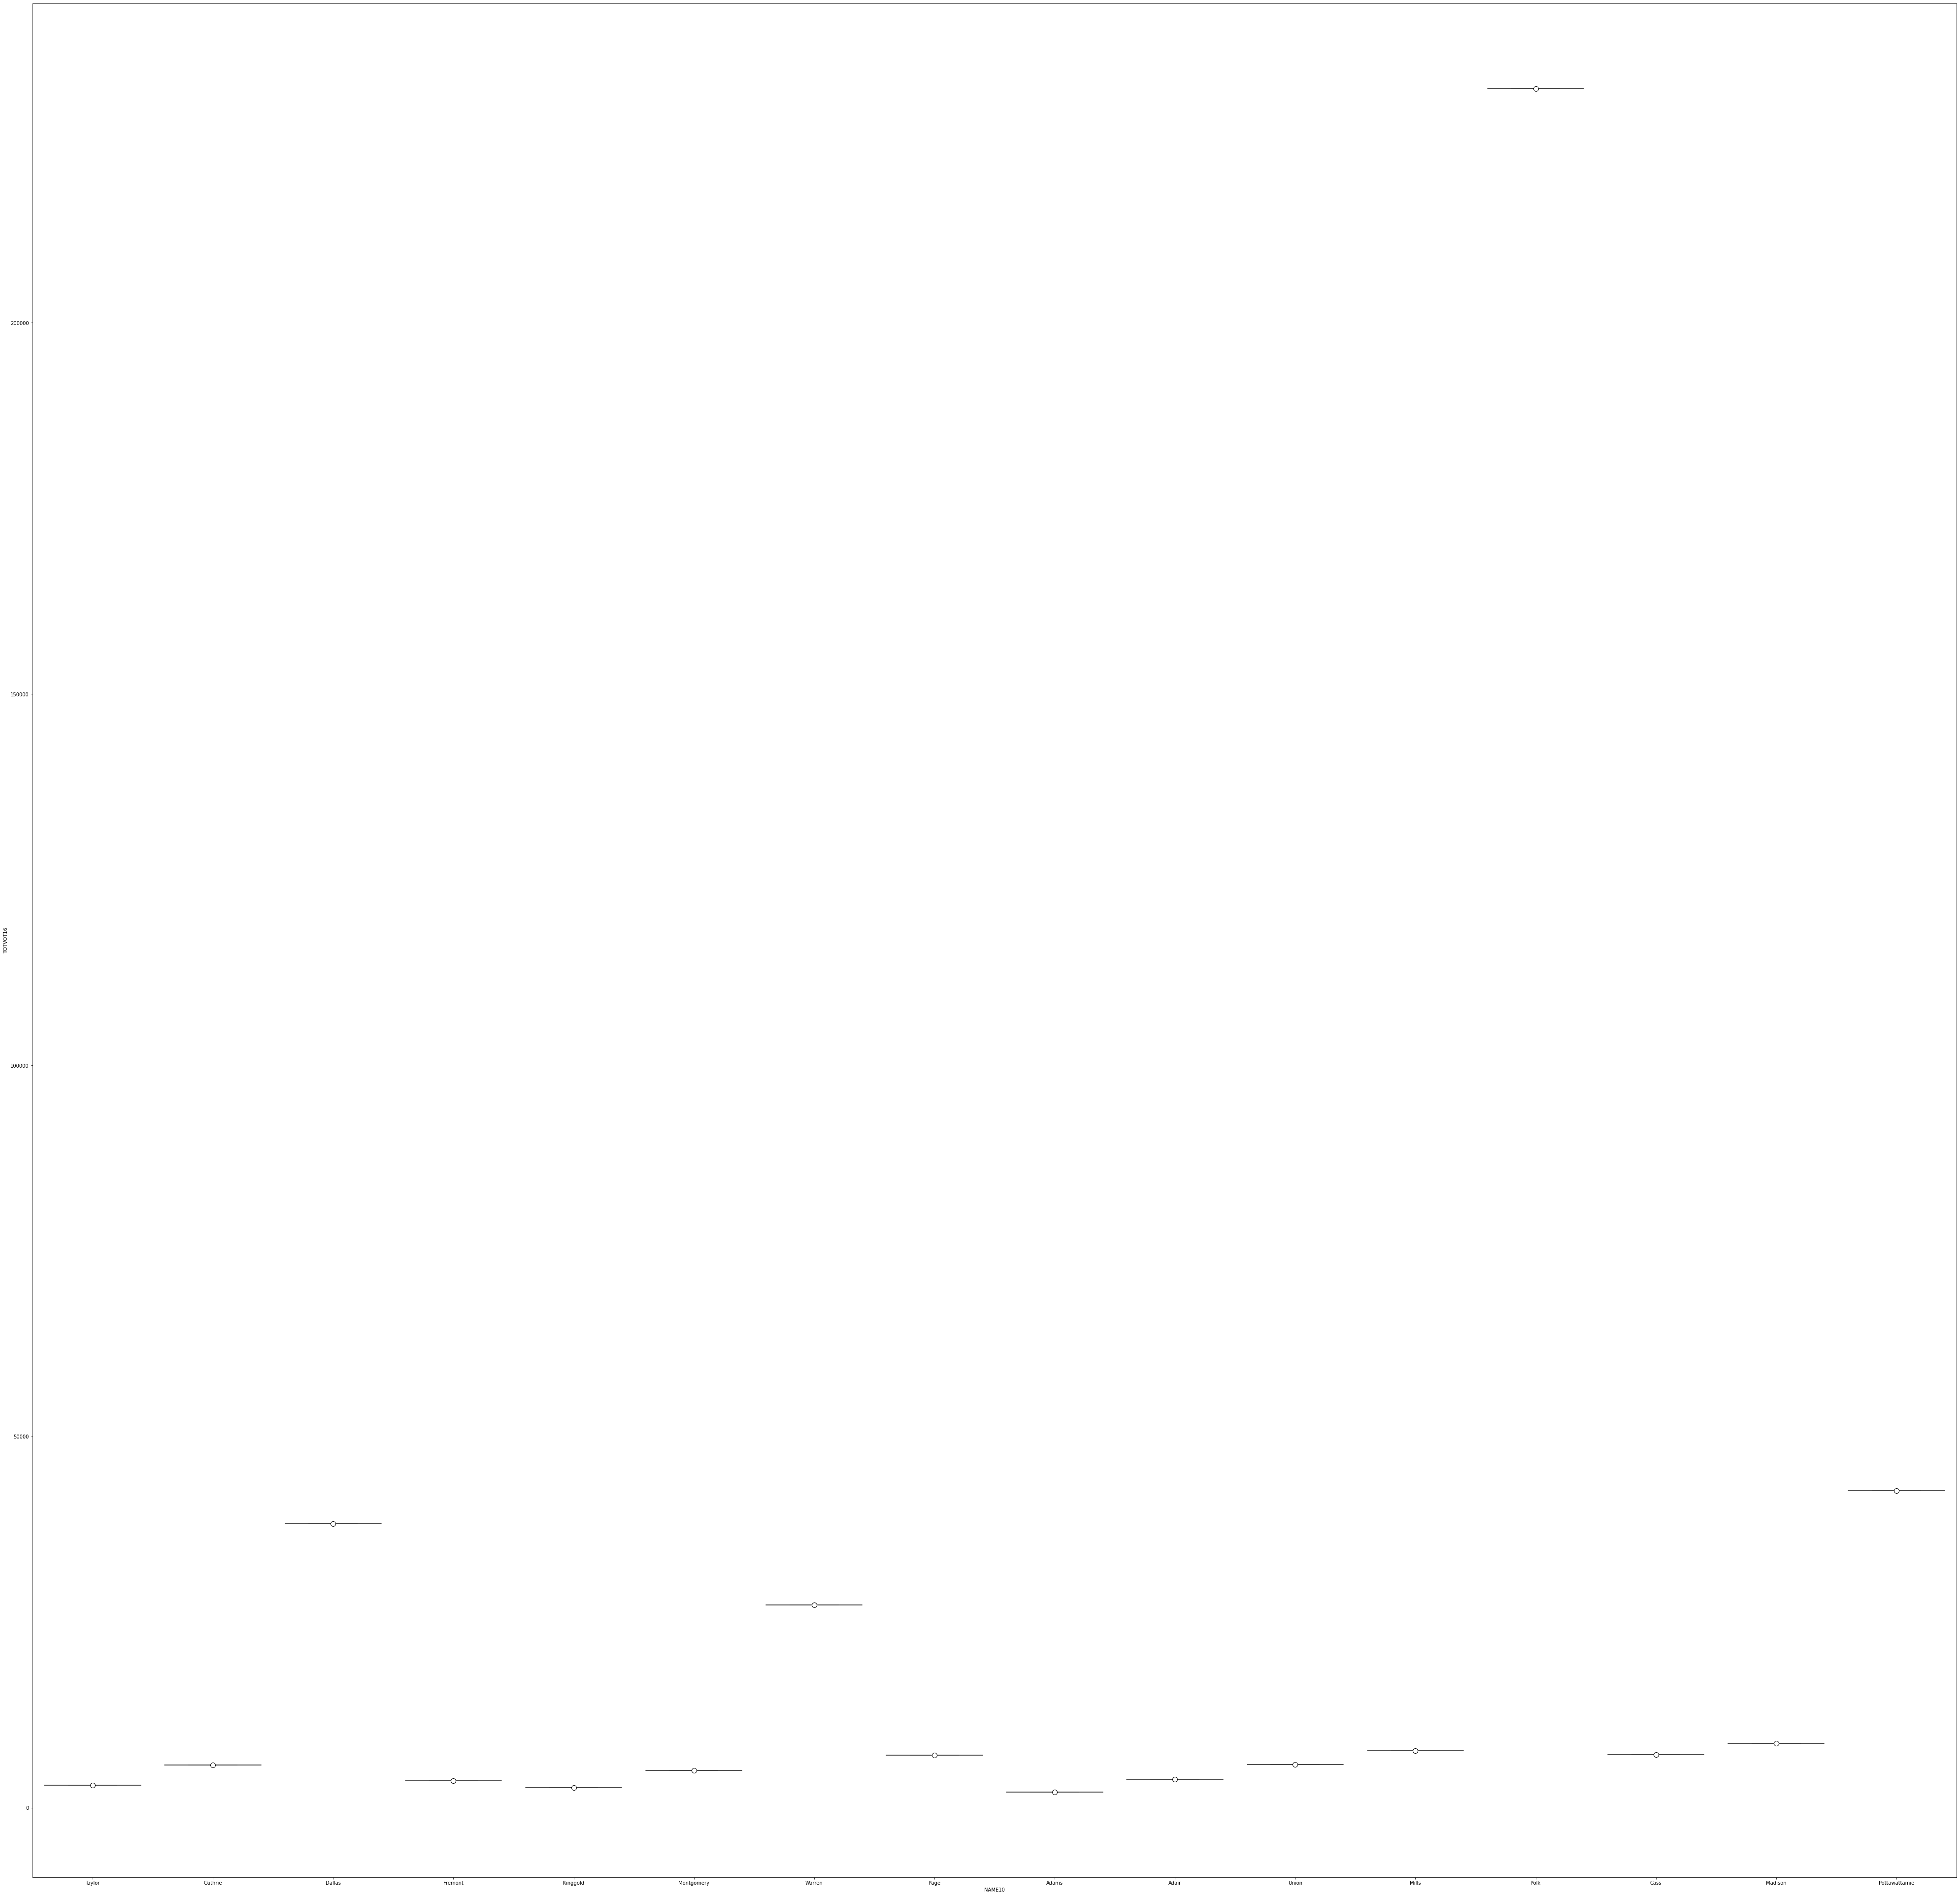

In [91]:
x = "NAME10"
y = "TOTVOT16"
plt.figure(figsize=(70,70,))
ax = sns.boxplot(x = x, y = y, data = CD_3, showmeans = True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

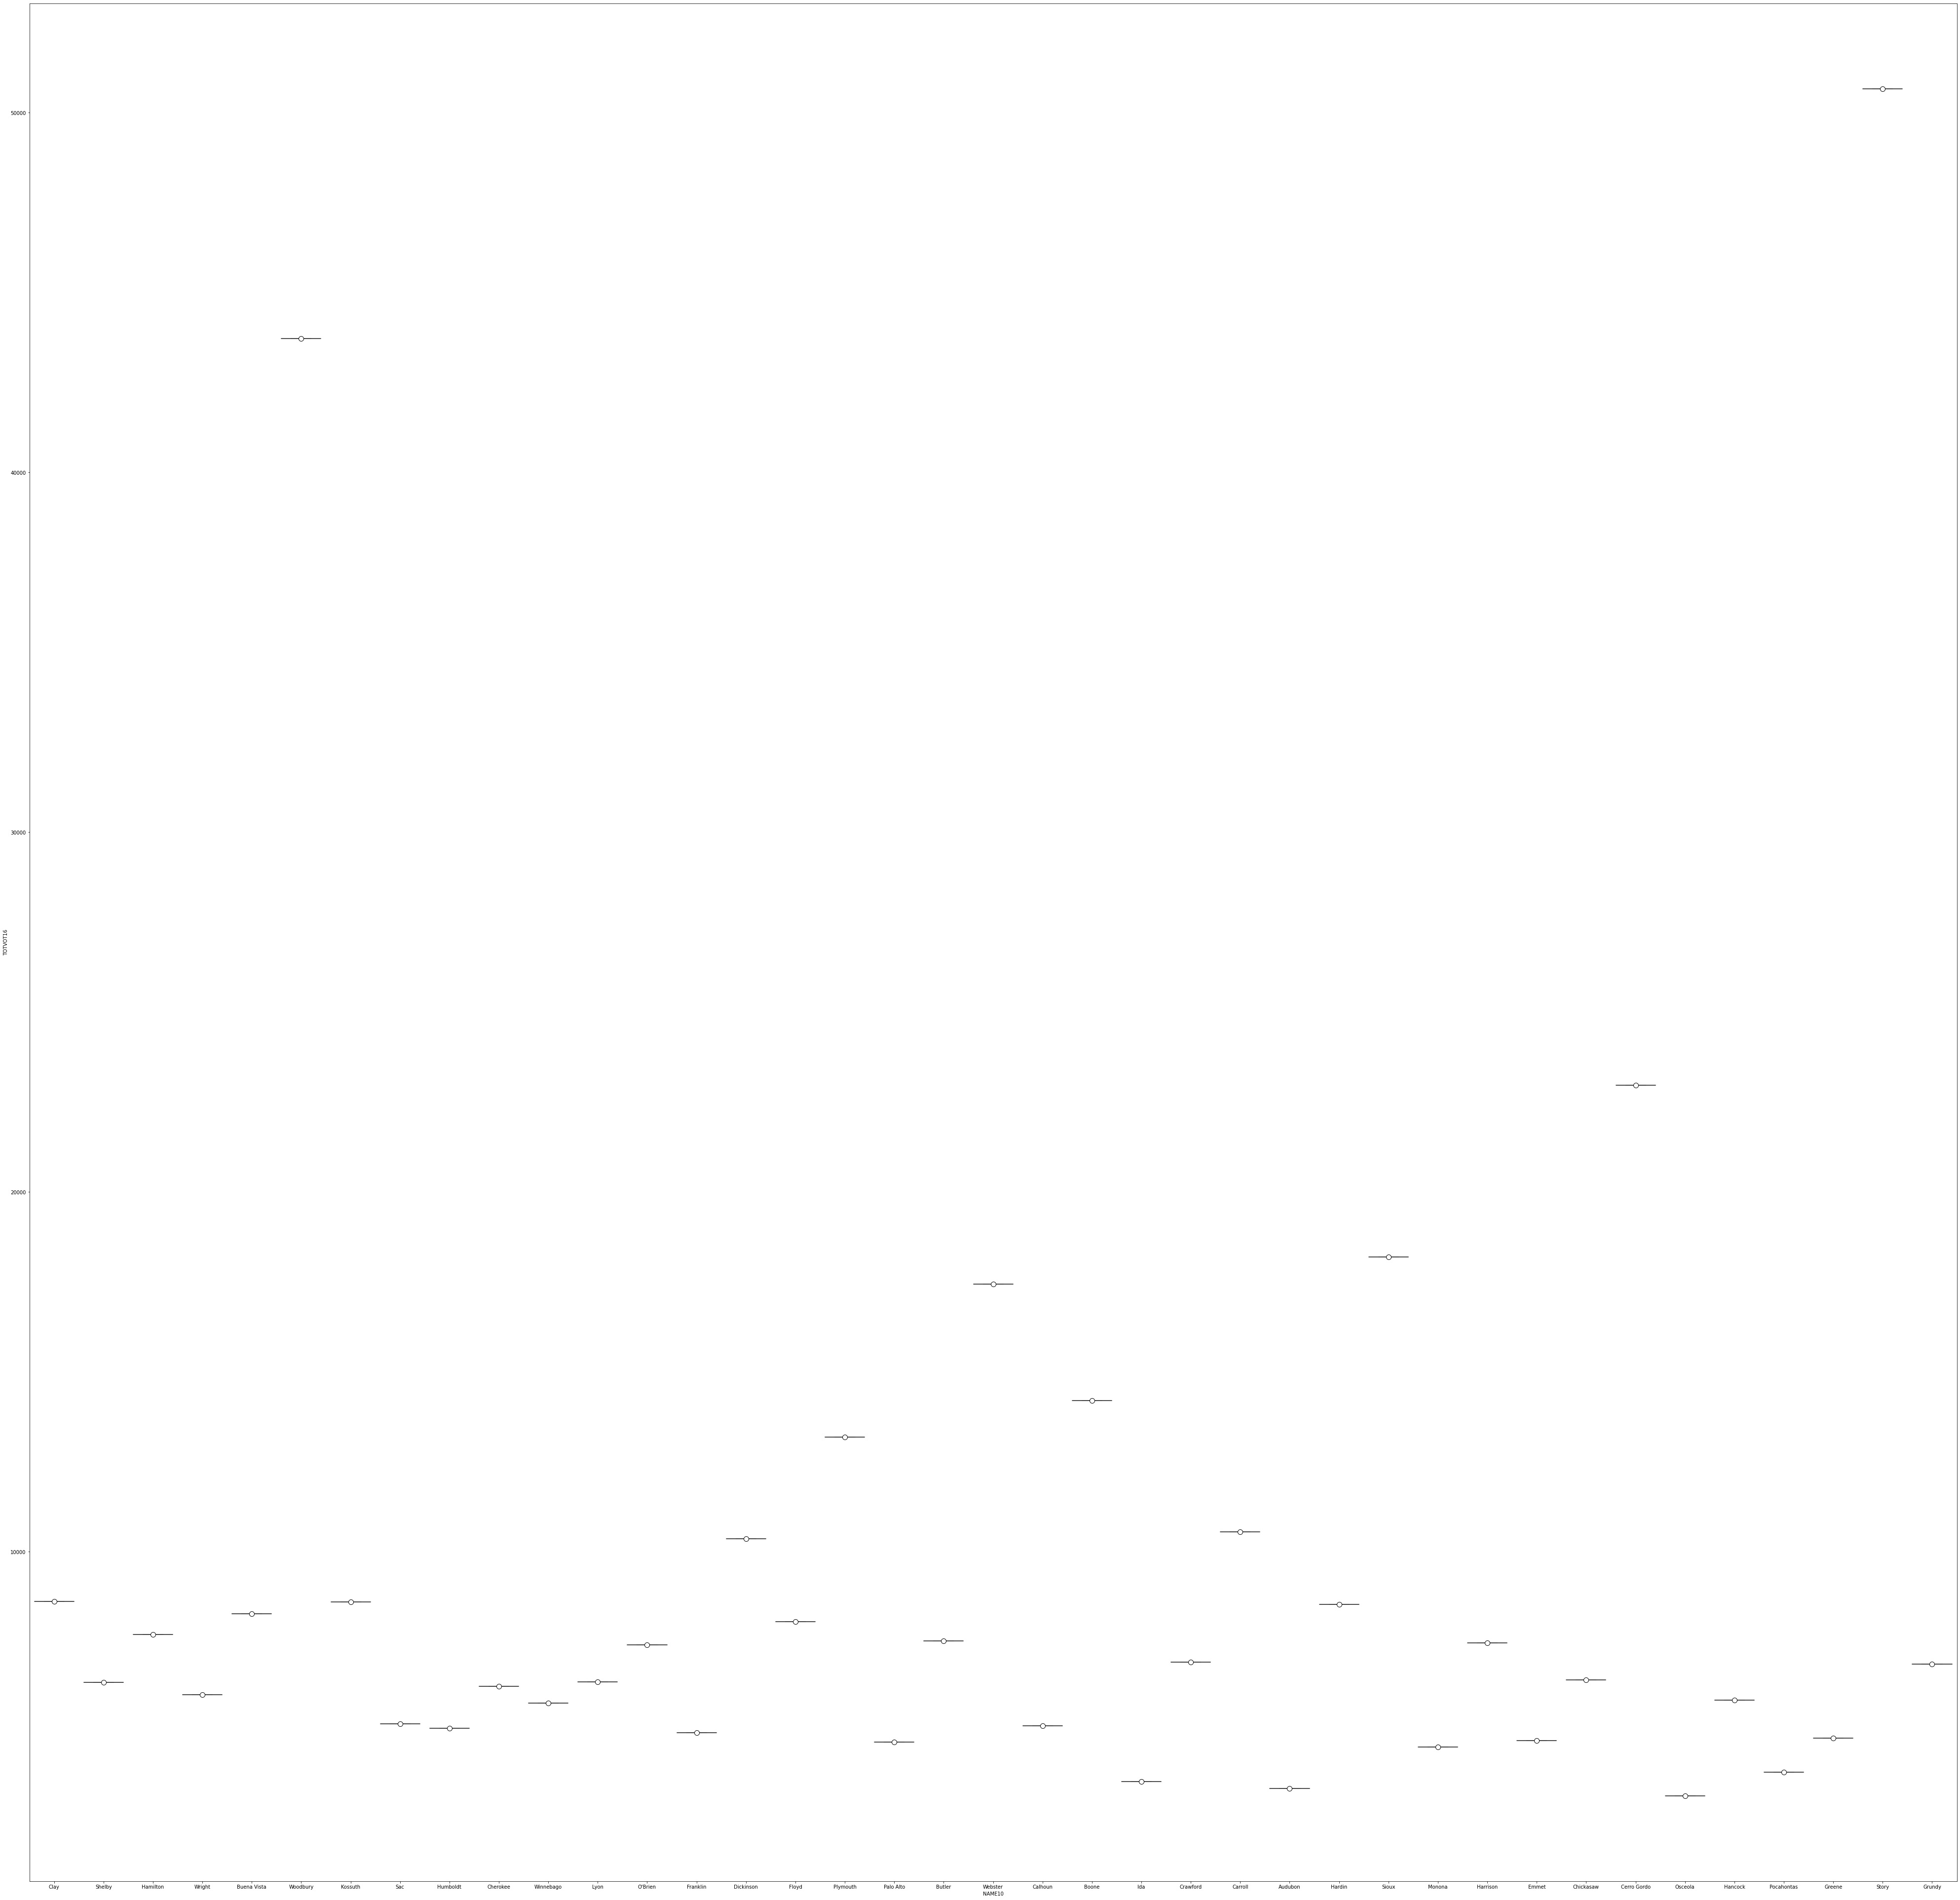

In [92]:
x = "NAME10"
y = "TOTVOT16"
plt.figure(figsize=(70,70,))
ax = sns.boxplot(x = x, y = y, data = CD_4, showmeans = True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()